In [793]:
import pandas as pd
import numpy as np
import re
# Importing some visualization libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)


In [760]:
def frange(start, stop, step):
    i = start
    while i < stop:
         yield i
         i += step

In [761]:
iris=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
te=pd.DataFrame(test)
te


,ID,houseID,builder,dateBuilt,datePriced,garden,dockDistance,capitalDistance,marketDistance,towerDistance,...,renovated,diningRooms,bedRooms,bathRooms,kingVisit,cursed,blessings,farmland,location,holyTree
0,1,6e33d031,The_Starks,2/5/1601 3:11 am,3/11/1610 4:59 am,0.0,105.449712,63.936036,25.687517,124.656380,...,NaN,3.0,2.0,3.0,0,0.0,96,1.0,NaN,1.0
1,2,6e33d037,The_Greens,2/17/1605 2:36 pm,7/7/1611 11:42 pm,0.0,10.028074,16.648880,NaN,148.906420,...,1.0,2.0,4.0,2.0,0,0.0,143,2.0,the mountains,1.0
2,3,6e33d03d,The_Ollivers,6/8/1604 11:52 am,8/1/1607 7:40 pm,NaN,46.697442,8.799759,33.374570,118.027166,...,0.0,NaN,3.0,3.0,0,NaN,151,1.0,king's landing,1.0
3,4,6e33d043,The_Greens,3/13/1600 10:21 pm,1/7/1612 1:52 pm,0.0,9.797009,8.831161,9.624204,123.956946,...,NaN,2.0,2.0,3.0,0,0.0,151,2.0,the mountains,NaN
4,5,6e33d045,The_Lannisters,1/1/1603 6:53 pm,1/17/1612 5:27 am,NaN,51.371900,32.903303,NaN,86.886693,...,1.0,3.0,3.0,2.0,0,0.0,127,1.0,the mountains,1.0
5,6,6e33d049,The_Greens,10/21/1605 2:15 pm,5/14/1612 7:22 pm,0.0,29.824765,51.848417,23.007202,63.369694,...,0.0,4.0,2.0,2.0,0,1.0,108,1.0,NaN,0.0
6,7,6e33d04d,The_Greens,8/3/1606 3:42 am,11/2/1608 12:50 am,0.0,31.737892,47.098394,41.647926,76.754042,...,0.0,2.0,2.0,2.0,0,0.0,113,1.0,the mountains,1.0
7,8,6e33d051,Bob,10/19/1600 8:21 pm,10/19/1612 7:59 am,0.0,13.943795,66.361720,17.472071,54.192768,...,0.0,3.0,2.0,4.0,0,0.0,94,1.0,NaN,1.0
8,9,6e33d053,The_Greens,10/13/1602 11:14 am,6/24/1607 3:34 am,0.0,23.340074,69.996626,144.284363,19.646201,...,0.0,2.0,3.0,3.0,0,0.0,90,1.0,the mountains,1.0
9,10,6e33d055,The_Greens,8/11/1600 12:37 pm,6/6/1608 4:22 pm,0.0,24.864534,81.504617,7.256853,87.784779,...,0.0,2.0,3.0,3.0,0,0.0,78,1.0,the mountains,NaN


In [762]:
iris
list(iris)
te.isnull().sum()

ID                   0
houseID              0
builder              0
dateBuilt            0
datePriced           0
garden             429
dockDistance       379
capitalDistance    184
marketDistance     471
towerDistance       90
riverDistance        0
knightDistance     184
renovated          364
diningRooms        352
bedRooms           126
bathRooms          202
kingVisit            0
cursed             224
blessings            0
farmland             4
location           404
holyTree           846
dtype: int64

In [763]:
df=pd.DataFrame(iris)
import datetime
#lisr
set(list(df['location']))
s = "19 Nov 2015  18:45:00.000"
d = datetime.datetime.strptime(s, "%d %b %Y  %H:%M:%S.%f")
d.year


2015

In [764]:
def removeout(df, col):
#     print(col)
#     print(df)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df.query('@Q1 - 1.5 * @IQR < '+col+' < @Q3 + 1.5 * @IQR')
    return df

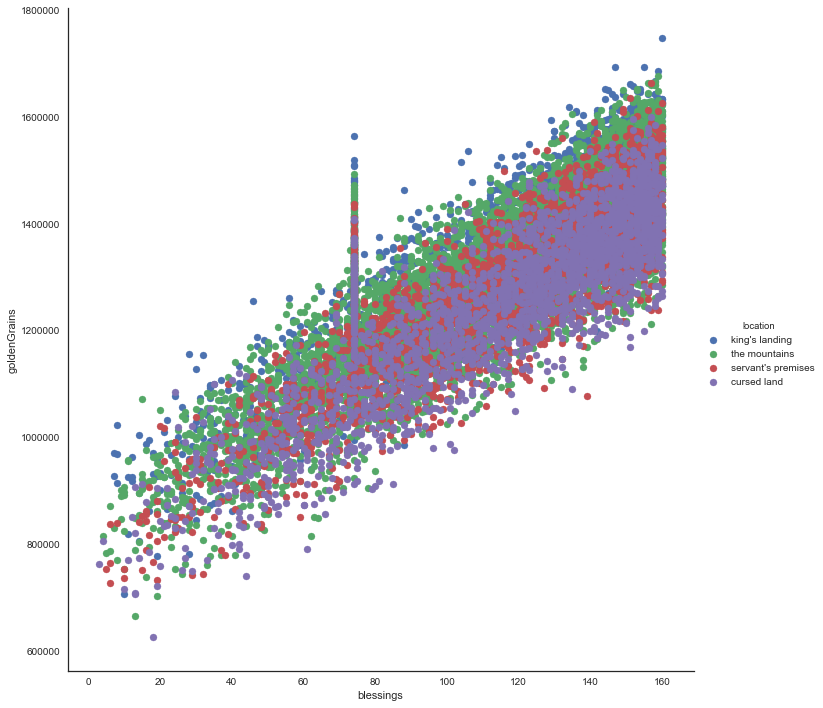

In [765]:
sns.FacetGrid(df, hue="location", size=10) \
   .map(plt.scatter, "blessings", "goldenGrains") \
   .add_legend()


In [766]:
string="as/12/1680"
li=list(string)
li
li.index("/",1)

2

In [767]:

df['dateBuilt']=df['dateBuilt'].apply(lambda x:x.upper())
for i in range(16500):
    string=str(df.iloc[i,3])
    index=re.search(r'[0-9]+/[0-9]+(/.*)',string).start(1);
    li=list(string)

    li[index+2]='9'
    stre = ''.join(str(e) for e in li)
    df.iloc[i,3]=stre


In [768]:

df['dateBuilt']=pd.to_datetime(df.dateBuilt)
df['HOUR'] = df['dateBuilt'].dt.hour
df['MONTH'] = df['dateBuilt'].dt.month
df['DATE'] = df['dateBuilt'].dt.day
df['YEAR'] = df['dateBuilt'].dt.year


In [769]:
df['datePriced']=df['datePriced'].apply(lambda x:x.upper())
for i in range(16500):
    string=str(df.iloc[i,4])
    index=re.search(r'[0-9]+/[0-9]+(/.*)',string).start(1);
    li=list(string)

    li[index+2]='9'
    stre = ''.join(str(e) for e in li)
    df.iloc[i,4]=stre

df['datePriced']=pd.to_datetime(df.datePriced)
df['HOURPriced'] = df['datePriced'].dt.hour
df['MONTHPriced'] = df['datePriced'].dt.month
df['DATEPriced'] = df['datePriced'].dt.day
df['YEARPriced'] = df['datePriced'].dt.year



In [770]:
iris=df

In [771]:
#df=removeout(df,'blessings')

In [772]:
df

,ID,houseID,builder,dateBuilt,datePriced,garden,dockDistance,capitalDistance,marketDistance,towerDistance,...,holyTree,goldenGrains,HOUR,MONTH,DATE,YEAR,HOURPriced,MONTHPriced,DATEPriced,YEARPriced
0,1,6e32cec0,Bob,1902-04-21 00:41:00,1909-07-09 01:11:00,0.0,138.600639,0.256239,69.486467,14.394903,...,1.0,1470912,0,4,21,1902,1,7,9,1909
1,2,6e32cec4,The_Starks,1900-08-23 00:25:00,1912-05-02 22:32:00,1.0,16.254871,26.882222,34.145238,101.052598,...,NaN,1241030,0,8,23,1900,22,5,2,1912
2,3,6e32cec9,Not_Known,1900-05-05 11:39:00,1908-06-10 08:17:00,0.0,6.555428,136.448973,78.445508,88.480988,...,1.0,838723,11,5,5,1900,8,6,10,1908
3,4,6e32cece,The_Kings,1903-02-10 20:51:00,1911-06-05 23:44:00,0.0,79.724550,19.885265,92.698917,22.395136,...,NaN,1267804,20,2,10,1903,23,6,5,1911
4,5,6e32ced1,The_Greens,1903-01-05 02:46:00,1910-10-08 05:18:00,0.0,101.541256,0.519507,3.605055,81.449646,...,1.0,1497166,2,1,5,1903,5,10,8,1910
5,6,6e32ced3,The_Greens,1903-01-25 18:38:00,1912-01-12 11:28:00,0.0,48.601612,7.575922,32.236989,47.180399,...,1.0,1428460,18,1,25,1903,11,1,12,1912
6,7,6e32ced5,Wood_Priests,1900-03-12 01:19:00,1907-10-26 21:54:00,0.0,32.624227,1.955970,88.485147,77.692256,...,1.0,1453568,1,3,12,1900,21,10,26,1907
7,8,6e32ced7,Masters_of_Stones,1903-04-28 00:52:00,1910-05-19 21:42:00,0.0,84.170405,15.776747,62.816373,51.870346,...,1.0,1381186,0,4,28,1903,21,5,19,1910
8,9,6e32ceda,Bob,1903-10-23 23:14:00,1911-10-21 07:40:00,0.0,10.998322,122.930753,63.794375,53.019891,...,1.0,1052137,23,10,23,1903,7,10,21,1911
9,10,6e32cedd,Bright_Brothers,1901-06-25 09:41:00,1907-11-01 09:54:00,0.0,60.265361,2.809867,23.701329,89.658984,...,1.0,1473032,9,6,25,1901,9,11,1,1907


In [773]:
housing = pd.read_csv('train.csv')
house_prices = pd.read_csv('house_prices.csv')
# print(house_prices)
for index,row in housing.iterrows():
    #if row[]
    id = row['houseID']
    print(id)
    print(row['goldenGrains'])
    print(house_prices[house_prices['House ID']==id])

6e32cec0
1470912
   House ID  Golden Grains
0  6e32cec0      1470912.0
6e32cec4
1241030
   House ID  Golden Grains
1  6e32cec4      1241030.0
6e32cec9
838723
   House ID  Golden Grains
2  6e32cec9       838723.0
6e32cece
1267804
   House ID  Golden Grains
3  6e32cece      1267804.0
6e32ced1
1497166
   House ID  Golden Grains
4  6e32ced1      1497166.0
6e32ced3
1428460
   House ID  Golden Grains
5  6e32ced3      1428460.0
6e32ced5
1453568
   House ID  Golden Grains
6  6e32ced5      1453568.0
6e32ced7
1381186
   House ID  Golden Grains
7  6e32ced7      1381186.0
6e32ceda
1052137
   House ID  Golden Grains
8  6e32ceda      1052137.0
6e32cedd
1473032
   House ID  Golden Grains
9  6e32cedd      1473032.0
6e32cedf
1442065
    House ID  Golden Grains
10  6e32cedf      1442065.0
6e32cee4
1583875
    House ID  Golden Grains
11  6e32cee4      1583875.0
6e32cee9
1430528
    House ID  Golden Grains
12  6e32cee9      1430528.0
6e32ceeb
957702
    House ID  Golden Grains
13  6e32ceeb       957702.0


291  6e32d356      1045269.0
6e32d35a
1400080
     House ID  Golden Grains
292  6e32d35a      1400080.0
6e32d35d
1576773
     House ID  Golden Grains
293  6e32d35d      1576773.0
6e32d363
1457943
     House ID  Golden Grains
294  6e32d363      1457943.0
6e32d369
1411591
     House ID  Golden Grains
295  6e32d369      1411591.0
6e32d36c
1406323
     House ID  Golden Grains
296  6e32d36c      1406323.0
6e32d370
1194661
     House ID  Golden Grains
297  6e32d370      1194661.0
6e32d374
1314903
     House ID  Golden Grains
298  6e32d374      1314903.0
6e32d376
1438808
     House ID  Golden Grains
299  6e32d376      1438808.0
6e32d37c
1550463
     House ID  Golden Grains
300  6e32d37c      1550463.0
6e32d37f
1138834
     House ID  Golden Grains
301  6e32d37f      1138834.0
6e32d383
1608754
     House ID  Golden Grains
302  6e32d383      1608754.0
6e32d385
1148616
     House ID  Golden Grains
303  6e32d385      1148616.0
6e32d38b
1696737
     House ID  Golden Grains
304  6e32d38b      169673

6e32d653
1193024
     House ID  Golden Grains
481  6e32d653      1193024.0
6e32d657
1264916
     House ID  Golden Grains
482  6e32d657      1264916.0
6e32d65a
1041349
     House ID  Golden Grains
483  6e32d65a      1041349.0
6e32d65e
1354512
     House ID  Golden Grains
484  6e32d65e      1354512.0
6e32d664
1468207
     House ID  Golden Grains
485  6e32d664      1468207.0
6e32d669
997067
     House ID  Golden Grains
486  6e32d669       997067.0
6e32d66f
1343544
     House ID  Golden Grains
487  6e32d66f      1343544.0
6e32d675
1220478
     House ID  Golden Grains
488  6e32d675      1220478.0
6e32d67a
1289528
     House ID  Golden Grains
489  6e32d67a      1289528.0
6e32d67c
1236559
     House ID  Golden Grains
490  6e32d67c      1236559.0
6e32d67e
1201680
     House ID  Golden Grains
491  6e32d67e      1201680.0
6e32d684
1396288
     House ID  Golden Grains
492  6e32d684      1396288.0
6e32d68a
1160853
     House ID  Golden Grains
493  6e32d68a      1160853.0
6e32d690
1166864
     Hous

6e32db48
1532683
     House ID  Golden Grains
795  6e32db48      1532683.0
6e32db4d
999244
     House ID  Golden Grains
796  6e32db4d       999244.0
6e32db4f
1463254
     House ID  Golden Grains
797  6e32db4f      1463254.0
6e32db53
1417563
     House ID  Golden Grains
798  6e32db53      1417563.0
6e32db59
1267699
     House ID  Golden Grains
799  6e32db59      1267699.0
6e32db5c
1158057
     House ID  Golden Grains
800  6e32db5c      1158057.0
6e32db61
1362430
     House ID  Golden Grains
801  6e32db61      1362430.0
6e32db66
1396516
     House ID  Golden Grains
802  6e32db66      1396516.0
6e32db6b
1449202
     House ID  Golden Grains
803  6e32db6b      1449202.0
6e32db71
1338017
     House ID  Golden Grains
804  6e32db71      1338017.0
6e32db76
1198993
     House ID  Golden Grains
805  6e32db76      1198993.0
6e32db78
1290542
     House ID  Golden Grains
806  6e32db78      1290542.0
6e32db7c
1563211
     House ID  Golden Grains
807  6e32db7c      1563211.0
6e32db80
1384636
     Hous

1494877
     House ID  Golden Grains
989  6e32de6e      1494877.0
6e32de72
1168325
     House ID  Golden Grains
990  6e32de72      1168325.0
6e32de78
1514026
     House ID  Golden Grains
991  6e32de78      1514026.0
6e32de7e
1427234
     House ID  Golden Grains
992  6e32de7e      1427234.0
6e32de83
1384262
     House ID  Golden Grains
993  6e32de83      1384262.0
6e32de88
1462655
     House ID  Golden Grains
994  6e32de88      1462655.0
6e32de8a
1318869
     House ID  Golden Grains
995  6e32de8a      1318869.0
6e32de8e
1346090
     House ID  Golden Grains
996  6e32de8e      1346090.0
6e32de90
1353394
     House ID  Golden Grains
997  6e32de90      1353394.0
6e32de94
995563
     House ID  Golden Grains
998  6e32de94       995563.0
6e32de99
1404799
     House ID  Golden Grains
999  6e32de99      1404799.0
6e32de9f
1362236
      House ID  Golden Grains
1000  6e32de9f      1362236.0
6e32dea5
1093085
      House ID  Golden Grains
1001  6e32dea5      1093085.0
6e32deaa
1311292
      House ID

6e32e35a
1456703
      House ID  Golden Grains
1294  6e32e35a      1456703.0
6e32e35f
1296800
      House ID  Golden Grains
1295  6e32e35f      1296800.0
6e32e362
1382156
      House ID  Golden Grains
1296  6e32e362      1382156.0
6e32e366
1365863
      House ID  Golden Grains
1297  6e32e366      1365863.0
6e32e36a
1312258
      House ID  Golden Grains
1298  6e32e36a      1312258.0
6e32e36d
1365418
      House ID  Golden Grains
1299  6e32e36d      1365418.0
6e32e372
934748
      House ID  Golden Grains
1300  6e32e372       934748.0
6e32e375
1446968
      House ID  Golden Grains
1301  6e32e375      1446968.0
6e32e37a
1307472
      House ID  Golden Grains
1302  6e32e37a      1307472.0
6e32e37e
1467507
      House ID  Golden Grains
1303  6e32e37e      1467507.0
6e32e380
977577
      House ID  Golden Grains
1304  6e32e380       977577.0
6e32e386
1412287
      House ID  Golden Grains
1305  6e32e386      1412287.0
6e32e38b
1308663
      House ID  Golden Grains
1306  6e32e38b      1308663.0
6

6e32e684
1364694
      House ID  Golden Grains
1490  6e32e684      1364694.0
6e32e687
1058470
      House ID  Golden Grains
1491  6e32e687      1058470.0
6e32e68a
1288651
      House ID  Golden Grains
1492  6e32e68a      1288651.0
6e32e68d
1216235
      House ID  Golden Grains
1493  6e32e68d      1216235.0
6e32e691
1441659
      House ID  Golden Grains
1494  6e32e691      1441659.0
6e32e695
1446410
      House ID  Golden Grains
1495  6e32e695      1446410.0
6e32e699
1408248
      House ID  Golden Grains
1496  6e32e699      1408248.0
6e32e69c
1286452
      House ID  Golden Grains
1497  6e32e69c      1286452.0
6e32e69f
1503685
      House ID  Golden Grains
1498  6e32e69f      1503685.0
6e32e6a1
1524742
      House ID  Golden Grains
1499  6e32e6a1      1524742.0
6e32e6a7
1292552
      House ID  Golden Grains
1500  6e32e6a7      1292552.0
6e32e6a9
1409577
      House ID  Golden Grains
1501  6e32e6a9      1409577.0
6e32e6ac
1195355
      House ID  Golden Grains
1502  6e32e6ac      1195355.0

1280890
      House ID  Golden Grains
1793  6e32eb1b      1280890.0
6e32eb1d
1389416
      House ID  Golden Grains
1794  6e32eb1d      1389416.0
6e32eb1f
1468503
      House ID  Golden Grains
1795  6e32eb1f      1468503.0
6e32eb23
1340353
      House ID  Golden Grains
1796  6e32eb23      1340353.0
6e32eb26
1286641
      House ID  Golden Grains
1797  6e32eb26      1286641.0
6e32eb2a
1286292
      House ID  Golden Grains
1798  6e32eb2a      1286292.0
6e32eb2c
1279174
      House ID  Golden Grains
1799  6e32eb2c      1279174.0
6e32eb2e
1072650
      House ID  Golden Grains
1800  6e32eb2e      1072650.0
6e32eb30
1461451
      House ID  Golden Grains
1801  6e32eb30      1461451.0
6e32eb35
1205086
      House ID  Golden Grains
1802  6e32eb35      1205086.0
6e32eb38
1518267
      House ID  Golden Grains
1803  6e32eb38      1518267.0
6e32eb3e
1400711
      House ID  Golden Grains
1804  6e32eb3e      1400711.0
6e32eb40
1396393
      House ID  Golden Grains
1805  6e32eb40      1396393.0
6e32eb42

      House ID  Golden Grains
1991  6e32ee1a      1556239.0
6e32ee1f
1258572
      House ID  Golden Grains
1992  6e32ee1f      1258572.0
6e32ee23
1344412
      House ID  Golden Grains
1993  6e32ee23      1344412.0
6e32ee27
1196486
      House ID  Golden Grains
1994  6e32ee27      1196486.0
6e32ee2a
1295753
      House ID  Golden Grains
1995  6e32ee2a      1295753.0
6e32ee2f
1457695
      House ID  Golden Grains
1996  6e32ee2f      1457695.0
6e32ee34
1373984
      House ID  Golden Grains
1997  6e32ee34      1373984.0
6e32ee37
1160050
      House ID  Golden Grains
1998  6e32ee37      1160050.0
6e32ee3b
1268701
      House ID  Golden Grains
1999  6e32ee3b      1268701.0
6e32ee40
1152140
      House ID  Golden Grains
2000  6e32ee40      1152140.0
6e32ee46
1502286
      House ID  Golden Grains
2001  6e32ee46      1502286.0
6e32ee48
1294673
      House ID  Golden Grains
2002  6e32ee48      1294673.0
6e32ee4c
905639
      House ID  Golden Grains
2003  6e32ee4c       905639.0
6e32ee4e
1436998


1027623
      House ID  Golden Grains
2291  6e32f2cd      1027623.0
6e32f2d1
1395899
      House ID  Golden Grains
2292  6e32f2d1      1395899.0
6e32f2d6
1490181
      House ID  Golden Grains
2293  6e32f2d6      1490181.0
6e32f2d9
1099715
      House ID  Golden Grains
2294  6e32f2d9      1099715.0
6e32f2dd
1232261
      House ID  Golden Grains
2295  6e32f2dd      1232261.0
6e32f2e2
1227226
      House ID  Golden Grains
2296  6e32f2e2      1227226.0
6e32f2e8
1208931
      House ID  Golden Grains
2297  6e32f2e8      1208931.0
6e32f2ea
1497884
      House ID  Golden Grains
2298  6e32f2ea      1497884.0
6e32f2ed
1338967
      House ID  Golden Grains
2299  6e32f2ed      1338967.0
6e32f2f0
1526438
      House ID  Golden Grains
2300  6e32f2f0      1526438.0
6e32f2f2
1420871
      House ID  Golden Grains
2301  6e32f2f2      1420871.0
6e32f2f4
1171360
      House ID  Golden Grains
2302  6e32f2f4      1171360.0
6e32f2f9
1313227
      House ID  Golden Grains
2303  6e32f2f9      1313227.0
6e32f2fc

6e32f5cf
1249826
      House ID  Golden Grains
2489  6e32f5cf      1249826.0
6e32f5d2
1096721
      House ID  Golden Grains
2490  6e32f5d2      1096721.0
6e32f5d5
1127998
      House ID  Golden Grains
2491  6e32f5d5      1127998.0
6e32f5d7
1324839
      House ID  Golden Grains
2492  6e32f5d7      1324839.0
6e32f5d9
1481530
      House ID  Golden Grains
2493  6e32f5d9      1481530.0
6e32f5df
1577499
      House ID  Golden Grains
2494  6e32f5df      1577499.0
6e32f5e5
1284968
      House ID  Golden Grains
2495  6e32f5e5      1284968.0
6e32f5e8
1512918
      House ID  Golden Grains
2496  6e32f5e8      1512918.0
6e32f5ea
1428211
      House ID  Golden Grains
2497  6e32f5ea      1428211.0
6e32f5ec
1540687
      House ID  Golden Grains
2498  6e32f5ec      1540687.0
6e32f5f0
1391922
      House ID  Golden Grains
2499  6e32f5f0      1391922.0
6e32f5f2
1379483
      House ID  Golden Grains
2500  6e32f5f2      1379483.0
6e32f5f5
1493921
      House ID  Golden Grains
2501  6e32f5f5      1493921.0

      House ID  Golden Grains
2794  6e32fa81      1444722.0
6e32fa83
1185627
      House ID  Golden Grains
2795  6e32fa83      1185627.0
6e32fa89
820385
      House ID  Golden Grains
2796  6e32fa89       820385.0
6e32fa8f
1264021
      House ID  Golden Grains
2797  6e32fa8f      1264021.0
6e32fa93
1490019
      House ID  Golden Grains
2798  6e32fa93      1490019.0
6e32fa96
1364096
      House ID  Golden Grains
2799  6e32fa96      1364096.0
6e32fa9b
1374694
      House ID  Golden Grains
2800  6e32fa9b      1374694.0
6e32fa9f
1173848
      House ID  Golden Grains
2801  6e32fa9f      1173848.0
6e32faa3
1281030
      House ID  Golden Grains
2802  6e32faa3      1281030.0
6e32faa8
1352134
      House ID  Golden Grains
2803  6e32faa8      1352134.0
6e32faaa
1456342
      House ID  Golden Grains
2804  6e32faaa      1456342.0
6e32faaf
880615
      House ID  Golden Grains
2805  6e32faaf       880615.0
6e32fab2
1270678
      House ID  Golden Grains
2806  6e32fab2      1270678.0
6e32fab7
1029253
 

931636
      House ID  Golden Grains
2985  6e32fd78       931636.0
6e32fd7c
1494267
      House ID  Golden Grains
2986  6e32fd7c      1494267.0
6e32fd81
1319801
      House ID  Golden Grains
2987  6e32fd81      1319801.0
6e32fd86
1252490
      House ID  Golden Grains
2988  6e32fd86      1252490.0
6e32fd8c
1236488
      House ID  Golden Grains
2989  6e32fd8c      1236488.0
6e32fd90
1250787
      House ID  Golden Grains
2990  6e32fd90      1250787.0
6e32fd95
1203599
      House ID  Golden Grains
2991  6e32fd95      1203599.0
6e32fd9a
1391423
      House ID  Golden Grains
2992  6e32fd9a      1391423.0
6e32fd9e
1418884
      House ID  Golden Grains
2993  6e32fd9e      1418884.0
6e32fda3
1197801
      House ID  Golden Grains
2994  6e32fda3      1197801.0
6e32fda9
1401756
      House ID  Golden Grains
2995  6e32fda9      1401756.0
6e32fdab
1445277
      House ID  Golden Grains
2996  6e32fdab      1445277.0
6e32fdae
1102793
      House ID  Golden Grains
2997  6e32fdae      1102793.0
6e32fdb4


1361191
      House ID  Golden Grains
3291  6e330227      1361191.0
6e330229
1313617
      House ID  Golden Grains
3292  6e330229      1313617.0
6e33022c
1397415
      House ID  Golden Grains
3293  6e33022c      1397415.0
6e33022e
1077622
      House ID  Golden Grains
3294  6e33022e      1077622.0
6e330234
1342375
      House ID  Golden Grains
3295  6e330234      1342375.0
6e330237
1495793
      House ID  Golden Grains
3296  6e330237      1495793.0
6e33023d
1221536
      House ID  Golden Grains
3297  6e33023d      1221536.0
6e330242
1434877
      House ID  Golden Grains
3298  6e330242      1434877.0
6e330245
1162848
      House ID  Golden Grains
3299  6e330245      1162848.0
6e330249
981849
      House ID  Golden Grains
3300  6e330249       981849.0
6e33024b
1448400
      House ID  Golden Grains
3301  6e33024b      1448400.0
6e33024d
1036385
      House ID  Golden Grains
3302  6e33024d      1036385.0
6e330253
1433204
      House ID  Golden Grains
3303  6e330253      1433204.0
6e330255


3486  6e330524      1156124.0
6e330528
1470341
      House ID  Golden Grains
3487  6e330528      1470341.0
6e33052a
1429938
      House ID  Golden Grains
3488  6e33052a      1429938.0
6e330530
1177809
      House ID  Golden Grains
3489  6e330530      1177809.0
6e330533
1397730
      House ID  Golden Grains
3490  6e330533      1397730.0
6e330535
1463767
      House ID  Golden Grains
3491  6e330535      1463767.0
6e33053b
1300693
      House ID  Golden Grains
3492  6e33053b      1300693.0
6e330541
1290625
      House ID  Golden Grains
3493  6e330541      1290625.0
6e330543
1209690
      House ID  Golden Grains
3494  6e330543      1209690.0
6e330546
1070144
      House ID  Golden Grains
3495  6e330546      1070144.0
6e330548
1418570
      House ID  Golden Grains
3496  6e330548      1418570.0
6e33054b
1219608
      House ID  Golden Grains
3497  6e33054b      1219608.0
6e33054f
1237328
      House ID  Golden Grains
3498  6e33054f      1237328.0
6e330551
1381029
      House ID  Golden Grains

      House ID  Golden Grains
3790  6e330a00      1463541.0
6e330a03
1081561
      House ID  Golden Grains
3791  6e330a03      1081561.0
6e330a05
1451549
      House ID  Golden Grains
3792  6e330a05      1451549.0
6e330a09
1085034
      House ID  Golden Grains
3793  6e330a09      1085034.0
6e330a0b
1177725
      House ID  Golden Grains
3794  6e330a0b      1177725.0
6e330a0e
1546613
      House ID  Golden Grains
3795  6e330a0e      1546613.0
6e330a11
912448
      House ID  Golden Grains
3796  6e330a11       912448.0
6e330a15
1366774
      House ID  Golden Grains
3797  6e330a15      1366774.0
6e330a18
1015591
      House ID  Golden Grains
3798  6e330a18      1015591.0
6e330a1b
1045322
      House ID  Golden Grains
3799  6e330a1b      1045322.0
6e330a20
1000968
      House ID  Golden Grains
3800  6e330a20      1000968.0
6e330a24
1515929
      House ID  Golden Grains
3801  6e330a24      1515929.0
6e330a2a
1232269
      House ID  Golden Grains
3802  6e330a2a      1232269.0
6e330a2f
1391648


1193189
      House ID  Golden Grains
3979  6e330cf1      1193189.0
6e330cf3
1247195
      House ID  Golden Grains
3980  6e330cf3      1247195.0
6e330cf6
1442431
      House ID  Golden Grains
3981  6e330cf6      1442431.0
6e330cfb
1388110
      House ID  Golden Grains
3982  6e330cfb      1388110.0
6e330cff
1383245
      House ID  Golden Grains
3983  6e330cff      1383245.0
6e330d04
1032044
      House ID  Golden Grains
3984  6e330d04      1032044.0
6e330d08
984906
      House ID  Golden Grains
3985  6e330d08       984906.0
6e330d0a
1412291
      House ID  Golden Grains
3986  6e330d0a      1412291.0
6e330d0c
1084910
      House ID  Golden Grains
3987  6e330d0c      1084910.0
6e330d10
1468022
      House ID  Golden Grains
3988  6e330d10      1468022.0
6e330d16
1490823
      House ID  Golden Grains
3989  6e330d16      1490823.0
6e330d1c
1283850
      House ID  Golden Grains
3990  6e330d1c      1283850.0
6e330d1f
1336452
      House ID  Golden Grains
3991  6e330d1f      1336452.0
6e330d25


1149807
      House ID  Golden Grains
4291  6e3311c2      1149807.0
6e3311c6
1552112
      House ID  Golden Grains
4292  6e3311c6      1552112.0
6e3311cb
951352
      House ID  Golden Grains
4293  6e3311cb       951352.0
6e3311d1
1056857
      House ID  Golden Grains
4294  6e3311d1      1056857.0
6e3311d6
1251648
      House ID  Golden Grains
4295  6e3311d6      1251648.0
6e3311db
1661704
      House ID  Golden Grains
4296  6e3311db      1661704.0
6e3311df
1262954
      House ID  Golden Grains
4297  6e3311df      1262954.0
6e3311e5
1203075
      House ID  Golden Grains
4298  6e3311e5      1203075.0
6e3311e8
1349623
      House ID  Golden Grains
4299  6e3311e8      1349623.0
6e3311ea
1443674
      House ID  Golden Grains
4300  6e3311ea      1443674.0
6e3311ef
1429741
      House ID  Golden Grains
4301  6e3311ef      1429741.0
6e3311f5
1298259
      House ID  Golden Grains
4302  6e3311f5      1298259.0
6e3311fa
1463716
      House ID  Golden Grains
4303  6e3311fa      1463716.0
6e3311fc


4487  6e3314d1      1183050.0
6e3314d6
1122871
      House ID  Golden Grains
4488  6e3314d6      1122871.0
6e3314da
1485878
      House ID  Golden Grains
4489  6e3314da      1485878.0
6e3314dc
1349005
      House ID  Golden Grains
4490  6e3314dc      1349005.0
6e3314df
1239275
      House ID  Golden Grains
4491  6e3314df      1239275.0
6e3314e1
1400262
      House ID  Golden Grains
4492  6e3314e1      1400262.0
6e3314e3
1476560
      House ID  Golden Grains
4493  6e3314e3      1476560.0
6e3314e8
1118355
      House ID  Golden Grains
4494  6e3314e8      1118355.0
6e3314ed
1268104
      House ID  Golden Grains
4495  6e3314ed      1268104.0
6e3314ef
1293443
      House ID  Golden Grains
4496  6e3314ef      1293443.0
6e3314f5
917575
      House ID  Golden Grains
4497  6e3314f5       917575.0
6e3314f7
1112312
      House ID  Golden Grains
4498  6e3314f7      1112312.0
6e3314f9
1482545
      House ID  Golden Grains
4499  6e3314f9      1482545.0
6e3314fe
1342517
      House ID  Golden Grains


1186658
      House ID  Golden Grains
4790  6e33196b      1186658.0
6e33196d
1425942
      House ID  Golden Grains
4791  6e33196d      1425942.0
6e331970
1371943
      House ID  Golden Grains
4792  6e331970      1371943.0
6e331972
1137473
      House ID  Golden Grains
4793  6e331972      1137473.0
6e331975
926304
      House ID  Golden Grains
4794  6e331975       926304.0
6e331977
1498550
      House ID  Golden Grains
4795  6e331977      1498550.0
6e331979
1189671
      House ID  Golden Grains
4796  6e331979      1189671.0
6e33197b
1057387
      House ID  Golden Grains
4797  6e33197b      1057387.0
6e331980
989775
      House ID  Golden Grains
4798  6e331980       989775.0
6e331982
1453377
      House ID  Golden Grains
4799  6e331982      1453377.0
6e331985
1328676
      House ID  Golden Grains
4800  6e331985      1328676.0
6e331988
1206224
      House ID  Golden Grains
4801  6e331988      1206224.0
6e33198e
1175404
      House ID  Golden Grains
4802  6e33198e      1175404.0
6e331992
1

1419129
      House ID  Golden Grains
4988  6e331c6c      1419129.0
6e331c6e
1420562
      House ID  Golden Grains
4989  6e331c6e      1420562.0
6e331c70
1043469
      House ID  Golden Grains
4990  6e331c70      1043469.0
6e331c72
1386344
      House ID  Golden Grains
4991  6e331c72      1386344.0
6e331c74
1453439
      House ID  Golden Grains
4992  6e331c74      1453439.0
6e331c79
1429928
      House ID  Golden Grains
4993  6e331c79      1429928.0
6e331c7e
1465822
      House ID  Golden Grains
4994  6e331c7e      1465822.0
6e331c83
1347562
      House ID  Golden Grains
4995  6e331c83      1347562.0
6e331c88
1209925
      House ID  Golden Grains
4996  6e331c88      1209925.0
6e331c8d
1168226
      House ID  Golden Grains
4997  6e331c8d      1168226.0
6e331c93
1431204
      House ID  Golden Grains
4998  6e331c93      1431204.0
6e331c95
1301751
      House ID  Golden Grains
4999  6e331c95      1301751.0
6e331c97
1355229
      House ID  Golden Grains
5000  6e331c97      1355229.0
6e331c9a

1262699
      House ID  Golden Grains
5291  6e332124      1262699.0
6e332126
1080344
      House ID  Golden Grains
5292  6e332126      1080344.0
6e332129
1432560
      House ID  Golden Grains
5293  6e332129      1432560.0
6e33212b
1577343
      House ID  Golden Grains
5294  6e33212b      1577343.0
6e33212d
1256439
      House ID  Golden Grains
5295  6e33212d      1256439.0
6e33212f
936592
      House ID  Golden Grains
5296  6e33212f       936592.0
6e332133
1433226
      House ID  Golden Grains
5297  6e332133      1433226.0
6e332139
1077828
      House ID  Golden Grains
5298  6e332139      1077828.0
6e33213e
1351915
      House ID  Golden Grains
5299  6e33213e      1351915.0
6e332143
1391733
      House ID  Golden Grains
5300  6e332143      1391733.0
6e332145
1573211
      House ID  Golden Grains
5301  6e332145      1573211.0
6e332147
1144405
      House ID  Golden Grains
5302  6e332147      1144405.0
6e332149
1368835
      House ID  Golden Grains
5303  6e332149      1368835.0
6e33214e


1342055
      House ID  Golden Grains
5487  6e332433      1342055.0
6e332438
1143956
      House ID  Golden Grains
5488  6e332438      1143956.0
6e33243b
1277807
      House ID  Golden Grains
5489  6e33243b      1277807.0
6e332440
1286834
      House ID  Golden Grains
5490  6e332440      1286834.0
6e332445
1442480
      House ID  Golden Grains
5491  6e332445      1442480.0
6e33244a
1386644
      House ID  Golden Grains
5492  6e33244a      1386644.0
6e33244e
1251487
      House ID  Golden Grains
5493  6e33244e      1251487.0
6e332450
1098957
      House ID  Golden Grains
5494  6e332450      1098957.0
6e332455
1176171
      House ID  Golden Grains
5495  6e332455      1176171.0
6e332457
1315586
      House ID  Golden Grains
5496  6e332457      1315586.0
6e33245b
1574812
      House ID  Golden Grains
5497  6e33245b      1574812.0
6e332461
1283343
      House ID  Golden Grains
5498  6e332461      1283343.0
6e332466
1322739
      House ID  Golden Grains
5499  6e332466      1322739.0
6e33246c

5791  6e3328f9      1452939.0
6e3328fd
1364257
      House ID  Golden Grains
5792  6e3328fd      1364257.0
6e332901
1399836
      House ID  Golden Grains
5793  6e332901      1399836.0
6e332904
1458479
      House ID  Golden Grains
5794  6e332904      1458479.0
6e332909
1451412
      House ID  Golden Grains
5795  6e332909      1451412.0
6e33290f
1330703
      House ID  Golden Grains
5796  6e33290f      1330703.0
6e332915
1320514
      House ID  Golden Grains
5797  6e332915      1320514.0
6e33291b
1432400
      House ID  Golden Grains
5798  6e33291b      1432400.0
6e332920
1280421
      House ID  Golden Grains
5799  6e332920      1280421.0
6e332923
1315236
      House ID  Golden Grains
5800  6e332923      1315236.0
6e332927
1382708
      House ID  Golden Grains
5801  6e332927      1382708.0
6e33292c
1551370
      House ID  Golden Grains
5802  6e33292c      1551370.0
6e332931
1146414
      House ID  Golden Grains
5803  6e332931      1146414.0
6e332936
1489262
      House ID  Golden Grains

      House ID  Golden Grains
5986  6e332c0a      1075561.0
6e332c0d
1395297
      House ID  Golden Grains
5987  6e332c0d      1395297.0
6e332c13
1068056
      House ID  Golden Grains
5988  6e332c13      1068056.0
6e332c18
1381276
      House ID  Golden Grains
5989  6e332c18      1381276.0
6e332c1b
1371460
      House ID  Golden Grains
5990  6e332c1b      1371460.0
6e332c1f
1343363
      House ID  Golden Grains
5991  6e332c1f      1343363.0
6e332c25
1574831
      House ID  Golden Grains
5992  6e332c25      1574831.0
6e332c2a
1185197
      House ID  Golden Grains
5993  6e332c2a      1185197.0
6e332c30
1300258
      House ID  Golden Grains
5994  6e332c30      1300258.0
6e332c33
1360530
      House ID  Golden Grains
5995  6e332c33      1360530.0
6e332c39
1335039
      House ID  Golden Grains
5996  6e332c39      1335039.0
6e332c3e
959962
      House ID  Golden Grains
5997  6e332c3e       959962.0
6e332c43
1521485
      House ID  Golden Grains
5998  6e332c43      1521485.0
6e332c45
1294580


1358201
      House ID  Golden Grains
6291  6e3330c8      1358201.0
6e3330cd
1525395
      House ID  Golden Grains
6292  6e3330cd      1525395.0
6e3330d0
1318061
      House ID  Golden Grains
6293  6e3330d0      1318061.0
6e3330d5
1386130
      House ID  Golden Grains
6294  6e3330d5      1386130.0
6e3330db
1226817
      House ID  Golden Grains
6295  6e3330db      1226817.0
6e3330e1
1345871
      House ID  Golden Grains
6296  6e3330e1      1345871.0
6e3330e7
1173952
      House ID  Golden Grains
6297  6e3330e7      1173952.0
6e3330ec
1441621
      House ID  Golden Grains
6298  6e3330ec      1441621.0
6e3330f0
1395471
      House ID  Golden Grains
6299  6e3330f0      1395471.0
6e3330f6
1382349
      House ID  Golden Grains
6300  6e3330f6      1382349.0
6e3330fb
1302846
      House ID  Golden Grains
6301  6e3330fb      1302846.0
6e3330fe
1151952
      House ID  Golden Grains
6302  6e3330fe      1151952.0
6e333102
1348739
      House ID  Golden Grains
6303  6e333102      1348739.0
6e333106

6e3333f5
1076396
      House ID  Golden Grains
6489  6e3333f5      1076396.0
6e3333f8
1282926
      House ID  Golden Grains
6490  6e3333f8      1282926.0
6e3333fd
942837
      House ID  Golden Grains
6491  6e3333fd       942837.0
6e3333ff
1181715
      House ID  Golden Grains
6492  6e3333ff      1181715.0
6e333401
1434599
      House ID  Golden Grains
6493  6e333401      1434599.0
6e333403
1149029
      House ID  Golden Grains
6494  6e333403      1149029.0
6e333409
1356727
      House ID  Golden Grains
6495  6e333409      1356727.0
6e33340b
1572218
      House ID  Golden Grains
6496  6e33340b      1572218.0
6e33340d
1213258
      House ID  Golden Grains
6497  6e33340d      1213258.0
6e33340f
1382073
      House ID  Golden Grains
6498  6e33340f      1382073.0
6e333411
1198562
      House ID  Golden Grains
6499  6e333411      1198562.0
6e333416
1052464
      House ID  Golden Grains
6500  6e333416      1052464.0
6e33341b
1483908
      House ID  Golden Grains
6501  6e33341b      1483908.0


1250123
      House ID  Golden Grains
6788  6e333883      1250123.0
6e333885
1430930
      House ID  Golden Grains
6789  6e333885      1430930.0
6e333887
1294287
      House ID  Golden Grains
6790  6e333887      1294287.0
6e33388a
1299738
      House ID  Golden Grains
6791  6e33388a      1299738.0
6e33388e
1444448
      House ID  Golden Grains
6792  6e33388e      1444448.0
6e333894
1263451
      House ID  Golden Grains
6793  6e333894      1263451.0
6e333896
1178054
      House ID  Golden Grains
6794  6e333896      1178054.0
6e333899
1293082
      House ID  Golden Grains
6795  6e333899      1293082.0
6e33389f
1316956
      House ID  Golden Grains
6796  6e33389f      1316956.0
6e3338a1
1220886
      House ID  Golden Grains
6797  6e3338a1      1220886.0
6e3338a7
1412984
      House ID  Golden Grains
6798  6e3338a7      1412984.0
6e3338ab
1469079
      House ID  Golden Grains
6799  6e3338ab      1469079.0
6e3338b0
1419151
      House ID  Golden Grains
6800  6e3338b0      1419151.0
6e3338b3

      House ID  Golden Grains
6977  6e333b87      1237386.0
6e333b8a
1531647
      House ID  Golden Grains
6978  6e333b8a      1531647.0
6e333b8e
1331017
      House ID  Golden Grains
6979  6e333b8e      1331017.0
6e333b91
1435780
      House ID  Golden Grains
6980  6e333b91      1435780.0
6e333b97
1116081
      House ID  Golden Grains
6981  6e333b97      1116081.0
6e333b9d
1241158
      House ID  Golden Grains
6982  6e333b9d      1241158.0
6e333ba1
1117675
      House ID  Golden Grains
6983  6e333ba1      1117675.0
6e333ba5
1400566
      House ID  Golden Grains
6984  6e333ba5      1400566.0
6e333bab
1339350
      House ID  Golden Grains
6985  6e333bab      1339350.0
6e333bae
1398021
      House ID  Golden Grains
6986  6e333bae      1398021.0
6e333bb0
1425317
      House ID  Golden Grains
6987  6e333bb0      1425317.0
6e333bb2
1449454
      House ID  Golden Grains
6988  6e333bb2      1449454.0
6e333bb4
1241447
      House ID  Golden Grains
6989  6e333bb4      1241447.0
6e333bb6
1460218

1541108
      House ID  Golden Grains
7188  6e333eb8      1541108.0
6e333ebe
1498407
      House ID  Golden Grains
7189  6e333ebe      1498407.0
6e333ec0
1247768
      House ID  Golden Grains
7190  6e333ec0      1247768.0
6e333ec6
1240141
      House ID  Golden Grains
7191  6e333ec6      1240141.0
6e333eca
1460307
      House ID  Golden Grains
7192  6e333eca      1460307.0
6e333ed0
1141251
      House ID  Golden Grains
7193  6e333ed0      1141251.0
6e333ed3
1167403
      House ID  Golden Grains
7194  6e333ed3      1167403.0
6e333ed6
1295805
      House ID  Golden Grains
7195  6e333ed6      1295805.0
6e333edb
1265288
      House ID  Golden Grains
7196  6e333edb      1265288.0
6e333ee1
1078760
      House ID  Golden Grains
7197  6e333ee1      1078760.0
6e333ee3
1428699
      House ID  Golden Grains
7198  6e333ee3      1428699.0
6e333ee6
1307367
      House ID  Golden Grains
7199  6e333ee6      1307367.0
6e333eec
1239160
      House ID  Golden Grains
7200  6e333eec      1239160.0
6e333eef

6e3342bd
1534293
      House ID  Golden Grains
7458  6e3342bd      1534293.0
6e3342c1
1272922
      House ID  Golden Grains
7459  6e3342c1      1272922.0
6e3342c4
1208719
      House ID  Golden Grains
7460  6e3342c4      1208719.0
6e3342c9
984612
      House ID  Golden Grains
7461  6e3342c9       984612.0
6e3342cd
1236907
      House ID  Golden Grains
7462  6e3342cd      1236907.0
6e3342cf
1046928
      House ID  Golden Grains
7463  6e3342cf      1046928.0
6e3342d2
1071632
      House ID  Golden Grains
7464  6e3342d2      1071632.0
6e3342d6
1522206
      House ID  Golden Grains
7465  6e3342d6      1522206.0
6e3342db
1359389
      House ID  Golden Grains
7466  6e3342db      1359389.0
6e3342e0
1470258
      House ID  Golden Grains
7467  6e3342e0      1470258.0
6e3342e2
1441176
      House ID  Golden Grains
7468  6e3342e2      1441176.0
6e3342e6
1091096
      House ID  Golden Grains
7469  6e3342e6      1091096.0
6e3342ec
1453071
      House ID  Golden Grains
7470  6e3342ec      1453071.0


6e33459c
1338122
      House ID  Golden Grains
7650  6e33459c      1338122.0
6e33459f
1214111
      House ID  Golden Grains
7651  6e33459f      1214111.0
6e3345a4
1534116
      House ID  Golden Grains
7652  6e3345a4      1534116.0
6e3345a6
1483278
      House ID  Golden Grains
7653  6e3345a6      1483278.0
6e3345aa
1158486
      House ID  Golden Grains
7654  6e3345aa      1158486.0
6e3345ad
1260993
      House ID  Golden Grains
7655  6e3345ad      1260993.0
6e3345b3
1275705
      House ID  Golden Grains
7656  6e3345b3      1275705.0
6e3345b8
1463209
      House ID  Golden Grains
7657  6e3345b8      1463209.0
6e3345bc
1401515
      House ID  Golden Grains
7658  6e3345bc      1401515.0
6e3345c1
1431999
      House ID  Golden Grains
7659  6e3345c1      1431999.0
6e3345c5
1337194
      House ID  Golden Grains
7660  6e3345c5      1337194.0
6e3345c8
1326159
      House ID  Golden Grains
7661  6e3345c8      1326159.0
6e3345cb
1333919
      House ID  Golden Grains
7662  6e3345cb      1333919.0

1347704
      House ID  Golden Grains
7954  6e334a69      1347704.0
6e334a6d
1009151
      House ID  Golden Grains
7955  6e334a6d      1009151.0
6e334a73
1464588
      House ID  Golden Grains
7956  6e334a73      1464588.0
6e334a78
1096754
      House ID  Golden Grains
7957  6e334a78      1096754.0
6e334a7c
1341752
      House ID  Golden Grains
7958  6e334a7c      1341752.0
6e334a7f
1308111
      House ID  Golden Grains
7959  6e334a7f      1308111.0
6e334a85
1087960
      House ID  Golden Grains
7960  6e334a85      1087960.0
6e334a88
1435821
      House ID  Golden Grains
7961  6e334a88      1435821.0
6e334a8d
1490865
      House ID  Golden Grains
7962  6e334a8d      1490865.0
6e334a92
1280510
      House ID  Golden Grains
7963  6e334a92      1280510.0
6e334a95
1262654
      House ID  Golden Grains
7964  6e334a95      1262654.0
6e334a97
1291542
      House ID  Golden Grains
7965  6e334a97      1291542.0
6e334a9a
1166712
      House ID  Golden Grains
7966  6e334a9a      1166712.0
6e334a9f

6e334d76
1333618
      House ID  Golden Grains
8144  6e334d76      1333618.0
6e334d7b
1252651
      House ID  Golden Grains
8145  6e334d7b      1252651.0
6e334d7d
1001503
      House ID  Golden Grains
8146  6e334d7d      1001503.0
6e334d80
1355690
      House ID  Golden Grains
8147  6e334d80      1355690.0
6e334d86
1190880
      House ID  Golden Grains
8148  6e334d86      1190880.0
6e334d8b
1236883
      House ID  Golden Grains
8149  6e334d8b      1236883.0
6e334d90
1359957
      House ID  Golden Grains
8150  6e334d90      1359957.0
6e334d95
1499561
      House ID  Golden Grains
8151  6e334d95      1499561.0
6e334d9b
800107
      House ID  Golden Grains
8152  6e334d9b       800107.0
6e334d9d
1248381
      House ID  Golden Grains
8153  6e334d9d      1248381.0
6e334d9f
1094333
      House ID  Golden Grains
8154  6e334d9f      1094333.0
6e334da1
1057593
      House ID  Golden Grains
8155  6e334da1      1057593.0
6e334da3
914692
      House ID  Golden Grains
8156  6e334da3       914692.0
6

6e33522d
1364279
      House ID  Golden Grains
8448  6e33522d      1364279.0
6e335231
1226667
      House ID  Golden Grains
8449  6e335231      1226667.0
6e335237
1078396
      House ID  Golden Grains
8450  6e335237      1078396.0
6e33523b
1416085
      House ID  Golden Grains
8451  6e33523b      1416085.0
6e335241
1278795
      House ID  Golden Grains
8452  6e335241      1278795.0
6e335244
1381744
      House ID  Golden Grains
8453  6e335244      1381744.0
6e33524a
1374136
      House ID  Golden Grains
8454  6e33524a      1374136.0
6e33524e
1476958
      House ID  Golden Grains
8455  6e33524e      1476958.0
6e335250
1583895
      House ID  Golden Grains
8456  6e335250      1583895.0
6e335253
1031513
      House ID  Golden Grains
8457  6e335253      1031513.0
6e335259
1286398
      House ID  Golden Grains
8458  6e335259      1286398.0
6e33525e
1368641
      House ID  Golden Grains
8459  6e33525e      1368641.0
6e335261
1472121
      House ID  Golden Grains
8460  6e335261      1472121.0

1183447
      House ID  Golden Grains
8632  6e3354f6      1183447.0
6e3354f9
1425799
      House ID  Golden Grains
8633  6e3354f9      1425799.0
6e3354ff
993804
      House ID  Golden Grains
8634  6e3354ff       993804.0
6e335505
1078992
      House ID  Golden Grains
8635  6e335505      1078992.0
6e335509
1424817
      House ID  Golden Grains
8636  6e335509      1424817.0
6e33550c
1399254
      House ID  Golden Grains
8637  6e33550c      1399254.0
6e33550f
1378299
      House ID  Golden Grains
8638  6e33550f      1378299.0
6e335513
1494357
      House ID  Golden Grains
8639  6e335513      1494357.0
6e335516
1498827
      House ID  Golden Grains
8640  6e335516      1498827.0
6e33551a
1566476
      House ID  Golden Grains
8641  6e33551a      1566476.0
6e33551d
1413223
      House ID  Golden Grains
8642  6e33551d      1413223.0
6e335523
1309155
      House ID  Golden Grains
8643  6e335523      1309155.0
6e335527
1242880
      House ID  Golden Grains
8644  6e335527      1242880.0
6e33552d


1445579
      House ID  Golden Grains
8831  6e33581c      1445579.0
6e335821
1332427
      House ID  Golden Grains
8832  6e335821      1332427.0
6e335827
1382414
      House ID  Golden Grains
8833  6e335827      1382414.0
6e33582b
1191559
      House ID  Golden Grains
8834  6e33582b      1191559.0
6e33582f
1599562
      House ID  Golden Grains
8835  6e33582f      1599562.0
6e335833
1432321
      House ID  Golden Grains
8836  6e335833      1432321.0
6e335836
1407525
      House ID  Golden Grains
8837  6e335836      1407525.0
6e33583a
1249819
      House ID  Golden Grains
8838  6e33583a      1249819.0
6e33583f
1299015
      House ID  Golden Grains
8839  6e33583f      1299015.0
6e335843
909347
      House ID  Golden Grains
8840  6e335843       909347.0
6e335847
1295170
      House ID  Golden Grains
8841  6e335847      1295170.0
6e335849
1514730
      House ID  Golden Grains
8842  6e335849      1514730.0
6e33584d
1410326
      House ID  Golden Grains
8843  6e33584d      1410326.0
6e335853


1208140
      House ID  Golden Grains
9123  6e335cb0      1208140.0
6e335cb5
1530133
      House ID  Golden Grains
9124  6e335cb5      1530133.0
6e335cbb
1163561
      House ID  Golden Grains
9125  6e335cbb      1163561.0
6e335cc0
1311849
      House ID  Golden Grains
9126  6e335cc0      1311849.0
6e335cc2
1307792
      House ID  Golden Grains
9127  6e335cc2      1307792.0
6e335cc8
1431191
      House ID  Golden Grains
9128  6e335cc8      1431191.0
6e335cca
938924
      House ID  Golden Grains
9129  6e335cca       938924.0
6e335ccf
1340053
      House ID  Golden Grains
9130  6e335ccf      1340053.0
6e335cd1
845735
      House ID  Golden Grains
9131  6e335cd1       845735.0
6e335cd4
1153317
      House ID  Golden Grains
9132  6e335cd4      1153317.0
6e335cd8
1319973
      House ID  Golden Grains
9133  6e335cd8      1319973.0
6e335cdc
1076935
      House ID  Golden Grains
9134  6e335cdc      1076935.0
6e335cdf
1237166
      House ID  Golden Grains
9135  6e335cdf      1237166.0
6e335ce3
1

6e335fcb
1397477
      House ID  Golden Grains
9321  6e335fcb      1397477.0
6e335fd0
1501538
      House ID  Golden Grains
9322  6e335fd0      1501538.0
6e335fd6
1333683
      House ID  Golden Grains
9323  6e335fd6      1333683.0
6e335fd8
1323181
      House ID  Golden Grains
9324  6e335fd8      1323181.0
6e335fdb
1478094
      House ID  Golden Grains
9325  6e335fdb      1478094.0
6e335fdd
1362728
      House ID  Golden Grains
9326  6e335fdd      1362728.0
6e335fe0
1455080
      House ID  Golden Grains
9327  6e335fe0      1455080.0
6e335fe3
1135653
      House ID  Golden Grains
9328  6e335fe3      1135653.0
6e335fe7
1307144
      House ID  Golden Grains
9329  6e335fe7      1307144.0
6e335fea
1419692
      House ID  Golden Grains
9330  6e335fea      1419692.0
6e335ff0
1187086
      House ID  Golden Grains
9331  6e335ff0      1187086.0
6e335ff5
1446123
      House ID  Golden Grains
9332  6e335ff5      1446123.0
6e335ff9
1538454
      House ID  Golden Grains
9333  6e335ff9      1538454.0

6e33649a
1359161
      House ID  Golden Grains
9622  6e33649a      1359161.0
6e33649f
1475013
      House ID  Golden Grains
9623  6e33649f      1475013.0
6e3364a4
1399590
      House ID  Golden Grains
9624  6e3364a4      1399590.0
6e3364a7
986481
      House ID  Golden Grains
9625  6e3364a7       986481.0
6e3364aa
1338500
      House ID  Golden Grains
9626  6e3364aa      1338500.0
6e3364ac
1442030
      House ID  Golden Grains
9627  6e3364ac      1442030.0
6e3364af
1132058
      House ID  Golden Grains
9628  6e3364af      1132058.0
6e3364b3
1024020
      House ID  Golden Grains
9629  6e3364b3      1024020.0
6e3364b8
1436346
      House ID  Golden Grains
9630  6e3364b8      1436346.0
6e3364bd
1449987
      House ID  Golden Grains
9631  6e3364bd      1449987.0
6e3364c3
1072475
      House ID  Golden Grains
9632  6e3364c3      1072475.0
6e3364c8
1205070
      House ID  Golden Grains
9633  6e3364c8      1205070.0
6e3364ca
1173165
      House ID  Golden Grains
9634  6e3364ca      1173165.0


1262852
      House ID  Golden Grains
9811  6e33679c      1262852.0
6e3367a0
1427338
      House ID  Golden Grains
9812  6e3367a0      1427338.0
6e3367a3
1418730
      House ID  Golden Grains
9813  6e3367a3      1418730.0
6e3367a9
1200185
      House ID  Golden Grains
9814  6e3367a9      1200185.0
6e3367ab
884134
      House ID  Golden Grains
9815  6e3367ab       884134.0
6e3367b0
1484683
      House ID  Golden Grains
9816  6e3367b0      1484683.0
6e3367b4
1135101
      House ID  Golden Grains
9817  6e3367b4      1135101.0
6e3367b7
1339796
      House ID  Golden Grains
9818  6e3367b7      1339796.0
6e3367bb
1387531
      House ID  Golden Grains
9819  6e3367bb      1387531.0
6e3367c0
1343443
      House ID  Golden Grains
9820  6e3367c0      1343443.0
6e3367c2
1299343
      House ID  Golden Grains
9821  6e3367c2      1299343.0
6e3367c6
1265953
      House ID  Golden Grains
9822  6e3367c6      1265953.0
6e3367ca
1412570
      House ID  Golden Grains
9823  6e3367ca      1412570.0
6e3367cd


10121  6e336c59      1450769.0
6e336c5c
1545221
       House ID  Golden Grains
10122  6e336c5c      1545221.0
6e336c61
1089082
       House ID  Golden Grains
10123  6e336c61      1089082.0
6e336c66
1348418
       House ID  Golden Grains
10124  6e336c66      1348418.0
6e336c6a
1333781
       House ID  Golden Grains
10125  6e336c6a      1333781.0
6e336c6d
1293692
       House ID  Golden Grains
10126  6e336c6d      1293692.0
6e336c73
1292663
       House ID  Golden Grains
10127  6e336c73      1292663.0
6e336c77
1446758
       House ID  Golden Grains
10128  6e336c77      1446758.0
6e336c7c
1387680
       House ID  Golden Grains
10129  6e336c7c      1387680.0
6e336c7f
1526642
       House ID  Golden Grains
10130  6e336c7f      1526642.0
6e336c84
1133079
       House ID  Golden Grains
10131  6e336c84      1133079.0
6e336c8a
1374528
       House ID  Golden Grains
10132  6e336c8a      1374528.0
6e336c90
1461645
       House ID  Golden Grains
10133  6e336c90      1461645.0
6e336c96
1032210
    

1500147
       House ID  Golden Grains
10314  6e336f68      1500147.0
6e336f6b
1156770
       House ID  Golden Grains
10315  6e336f6b      1156770.0
6e336f70
1161601
       House ID  Golden Grains
10316  6e336f70      1161601.0
6e336f72
1534137
       House ID  Golden Grains
10317  6e336f72      1534137.0
6e336f75
1425476
       House ID  Golden Grains
10318  6e336f75      1425476.0
6e336f78
1251772
       House ID  Golden Grains
10319  6e336f78      1251772.0
6e336f7d
959212
       House ID  Golden Grains
10320  6e336f7d       959212.0
6e336f80
1156204
       House ID  Golden Grains
10321  6e336f80      1156204.0
6e336f84
1139707
       House ID  Golden Grains
10322  6e336f84      1139707.0
6e336f86
1345264
       House ID  Golden Grains
10323  6e336f86      1345264.0
6e336f8a
1476745
       House ID  Golden Grains
10324  6e336f8a      1476745.0
6e336f8e
1207106
       House ID  Golden Grains
10325  6e336f8e      1207106.0
6e336f93
1293133
       House ID  Golden Grains
10326  6e336f9

10622  6e337437      1397426.0
6e33743a
1344026
       House ID  Golden Grains
10623  6e33743a      1344026.0
6e337440
1085068
       House ID  Golden Grains
10624  6e337440      1085068.0
6e337445
1111556
       House ID  Golden Grains
10625  6e337445      1111556.0
6e33744a
1491445
       House ID  Golden Grains
10626  6e33744a      1491445.0
6e33744f
1242853
       House ID  Golden Grains
10627  6e33744f      1242853.0
6e337452
1433873
       House ID  Golden Grains
10628  6e337452      1433873.0
6e337456
1471050
       House ID  Golden Grains
10629  6e337456      1471050.0
6e337458
1452551
       House ID  Golden Grains
10630  6e337458      1452551.0
6e33745a
1433272
       House ID  Golden Grains
10631  6e33745a      1433272.0
6e33745c
1454185
       House ID  Golden Grains
10632  6e33745c      1454185.0
6e337460
1213837
       House ID  Golden Grains
10633  6e337460      1213837.0
6e337464
1310767
       House ID  Golden Grains
10634  6e337464      1310767.0
6e337466
1541654
    

10815  6e33771b      1295717.0
6e337721
1379457
       House ID  Golden Grains
10816  6e337721      1379457.0
6e337724
1216640
       House ID  Golden Grains
10817  6e337724      1216640.0
6e337728
1475190
       House ID  Golden Grains
10818  6e337728      1475190.0
6e33772d
1441048
       House ID  Golden Grains
10819  6e33772d      1441048.0
6e33772f
1311337
       House ID  Golden Grains
10820  6e33772f      1311337.0
6e337735
1449501
       House ID  Golden Grains
10821  6e337735      1449501.0
6e337738
1270451
       House ID  Golden Grains
10822  6e337738      1270451.0
6e33773e
1448592
       House ID  Golden Grains
10823  6e33773e      1448592.0
6e337743
881371
       House ID  Golden Grains
10824  6e337743       881371.0
6e337749
1594111
       House ID  Golden Grains
10825  6e337749      1594111.0
6e33774d
1445150
       House ID  Golden Grains
10826  6e33774d      1445150.0
6e33774f
1345088
       House ID  Golden Grains
10827  6e33774f      1345088.0
6e337751
1362239
     

1319902
       House ID  Golden Grains
11118  6e337bd2      1319902.0
6e337bd7
1339618
       House ID  Golden Grains
11119  6e337bd7      1339618.0
6e337bdc
883883
       House ID  Golden Grains
11120  6e337bdc       883883.0
6e337bdf
1350526
       House ID  Golden Grains
11121  6e337bdf      1350526.0
6e337be2
1366646
       House ID  Golden Grains
11122  6e337be2      1366646.0
6e337be7
1216480
       House ID  Golden Grains
11123  6e337be7      1216480.0
6e337be9
1184491
       House ID  Golden Grains
11124  6e337be9      1184491.0
6e337bee
1304339
       House ID  Golden Grains
11125  6e337bee      1304339.0
6e337bf3
881365
       House ID  Golden Grains
11126  6e337bf3       881365.0
6e337bf6
1397559
       House ID  Golden Grains
11127  6e337bf6      1397559.0
6e337bfc
1312461
       House ID  Golden Grains
11128  6e337bfc      1312461.0
6e337c00
793646
       House ID  Golden Grains
11129  6e337c00       793646.0
6e337c06
893412
       House ID  Golden Grains
11130  6e337c06  

       House ID  Golden Grains
11309  6e337ee9      1380043.0
6e337eec
1011716
       House ID  Golden Grains
11310  6e337eec      1011716.0
6e337ef1
1341241
       House ID  Golden Grains
11311  6e337ef1      1341241.0
6e337ef5
960605
       House ID  Golden Grains
11312  6e337ef5       960605.0
6e337ef7
1237955
       House ID  Golden Grains
11313  6e337ef7      1237955.0
6e337efa
1249270
       House ID  Golden Grains
11314  6e337efa      1249270.0
6e337eff
1233400
       House ID  Golden Grains
11315  6e337eff      1233400.0
6e337f04
1228689
       House ID  Golden Grains
11316  6e337f04      1228689.0
6e337f06
1360706
       House ID  Golden Grains
11317  6e337f06      1360706.0
6e337f0b
1508545
       House ID  Golden Grains
11318  6e337f0b      1508545.0
6e337f11
1160874
       House ID  Golden Grains
11319  6e337f11      1160874.0
6e337f17
1547515
       House ID  Golden Grains
11320  6e337f17      1547515.0
6e337f1d
1300925
       House ID  Golden Grains
11321  6e337f1d      1

11617  6e3383af      1506887.0
6e3383b5
1327287
       House ID  Golden Grains
11618  6e3383b5      1327287.0
6e3383b9
1383096
       House ID  Golden Grains
11619  6e3383b9      1383096.0
6e3383be
1423585
       House ID  Golden Grains
11620  6e3383be      1423585.0
6e3383c4
1465801
       House ID  Golden Grains
11621  6e3383c4      1465801.0
6e3383c6
1227649
       House ID  Golden Grains
11622  6e3383c6      1227649.0
6e3383cc
1176521
       House ID  Golden Grains
11623  6e3383cc      1176521.0
6e3383cf
1468258
       House ID  Golden Grains
11624  6e3383cf      1468258.0
6e3383d2
1211669
       House ID  Golden Grains
11625  6e3383d2      1211669.0
6e3383d5
1505807
       House ID  Golden Grains
11626  6e3383d5      1505807.0
6e3383da
1263966
       House ID  Golden Grains
11627  6e3383da      1263966.0
6e3383df
1318532
       House ID  Golden Grains
11628  6e3383df      1318532.0
6e3383e2
1489326
       House ID  Golden Grains
11629  6e3383e2      1489326.0
6e3383e7
1434235
    

1361021
       House ID  Golden Grains
11806  6e3386b8      1361021.0
6e3386bb
1271307
       House ID  Golden Grains
11807  6e3386bb      1271307.0
6e3386bd
1165524
       House ID  Golden Grains
11808  6e3386bd      1165524.0
6e3386bf
1399341
       House ID  Golden Grains
11809  6e3386bf      1399341.0
6e3386c2
1052913
       House ID  Golden Grains
11810  6e3386c2      1052913.0
6e3386c7
1277052
       House ID  Golden Grains
11811  6e3386c7      1277052.0
6e3386ca
1175760
       House ID  Golden Grains
11812  6e3386ca      1175760.0
6e3386cd
1303896
       House ID  Golden Grains
11813  6e3386cd      1303896.0
6e3386cf
1390180
       House ID  Golden Grains
11814  6e3386cf      1390180.0
6e3386d4
1443373
       House ID  Golden Grains
11815  6e3386d4      1443373.0
6e3386d7
1505999
       House ID  Golden Grains
11816  6e3386d7      1505999.0
6e3386dc
1186117
       House ID  Golden Grains
11817  6e3386dc      1186117.0
6e3386de
1009563
       House ID  Golden Grains
11818  6e3386

1097138
       House ID  Golden Grains
12120  6e338b9f      1097138.0
6e338ba1
1471921
       House ID  Golden Grains
12121  6e338ba1      1471921.0
6e338ba3
1220951
       House ID  Golden Grains
12122  6e338ba3      1220951.0
6e338ba7
1307972
       House ID  Golden Grains
12123  6e338ba7      1307972.0
6e338baa
1254740
       House ID  Golden Grains
12124  6e338baa      1254740.0
6e338bad
899808
       House ID  Golden Grains
12125  6e338bad       899808.0
6e338baf
1455443
       House ID  Golden Grains
12126  6e338baf      1455443.0
6e338bb2
1338693
       House ID  Golden Grains
12127  6e338bb2      1338693.0
6e338bb8
927072
       House ID  Golden Grains
12128  6e338bb8       927072.0
6e338bba
1212954
       House ID  Golden Grains
12129  6e338bba      1212954.0
6e338bbe
1298997
       House ID  Golden Grains
12130  6e338bbe      1298997.0
6e338bc4
1083575
       House ID  Golden Grains
12131  6e338bc4      1083575.0
6e338bc8
1559137
       House ID  Golden Grains
12132  6e338bc8

1360575
       House ID  Golden Grains
12314  6e338e98      1360575.0
6e338e9c
1170317
       House ID  Golden Grains
12315  6e338e9c      1170317.0
6e338ea2
1190195
       House ID  Golden Grains
12316  6e338ea2      1190195.0
6e338ea7
1031658
       House ID  Golden Grains
12317  6e338ea7      1031658.0
6e338ea9
1480320
       House ID  Golden Grains
12318  6e338ea9      1480320.0
6e338eab
1270938
       House ID  Golden Grains
12319  6e338eab      1270938.0
6e338eb1
1285404
       House ID  Golden Grains
12320  6e338eb1      1285404.0
6e338eb7
1358083
       House ID  Golden Grains
12321  6e338eb7      1358083.0
6e338ebd
1430078
       House ID  Golden Grains
12322  6e338ebd      1430078.0
6e338ec1
1618623
       House ID  Golden Grains
12323  6e338ec1      1618623.0
6e338ec6
1482662
       House ID  Golden Grains
12324  6e338ec6      1482662.0
6e338eca
1299045
       House ID  Golden Grains
12325  6e338eca      1299045.0
6e338ed0
1467358
       House ID  Golden Grains
12326  6e338e

6e33935b
1306077
       House ID  Golden Grains
12618  6e33935b      1306077.0
6e339361
821304
       House ID  Golden Grains
12619  6e339361       821304.0
6e339367
1131053
       House ID  Golden Grains
12620  6e339367      1131053.0
6e33936c
1442149
       House ID  Golden Grains
12621  6e33936c      1442149.0
6e339370
1217065
       House ID  Golden Grains
12622  6e339370      1217065.0
6e339373
1427738
       House ID  Golden Grains
12623  6e339373      1427738.0
6e339375
1446621
       House ID  Golden Grains
12624  6e339375      1446621.0
6e339379
1294785
       House ID  Golden Grains
12625  6e339379      1294785.0
6e33937b
1406998
       House ID  Golden Grains
12626  6e33937b      1406998.0
6e339380
1419591
       House ID  Golden Grains
12627  6e339380      1419591.0
6e339385
1468495
       House ID  Golden Grains
12628  6e339385      1468495.0
6e339388
1262054
       House ID  Golden Grains
12629  6e339388      1262054.0
6e33938c
1549085
       House ID  Golden Grains
12630

       House ID  Golden Grains
12815  6e339673      1254116.0
6e339675
1274910
       House ID  Golden Grains
12816  6e339675      1274910.0
6e339679
1194193
       House ID  Golden Grains
12817  6e339679      1194193.0
6e33967f
1126710
       House ID  Golden Grains
12818  6e33967f      1126710.0
6e339684
1351409
       House ID  Golden Grains
12819  6e339684      1351409.0
6e339689
1177992
       House ID  Golden Grains
12820  6e339689      1177992.0
6e33968d
1406389
       House ID  Golden Grains
12821  6e33968d      1406389.0
6e339692
1508293
       House ID  Golden Grains
12822  6e339692      1508293.0
6e339696
1579072
       House ID  Golden Grains
12823  6e339696      1579072.0
6e33969a
1135138
       House ID  Golden Grains
12824  6e33969a      1135138.0
6e3396a0
1311884
       House ID  Golden Grains
12825  6e3396a0      1311884.0
6e3396a5
1215354
       House ID  Golden Grains
12826  6e3396a5      1215354.0
6e3396a9
1392088
       House ID  Golden Grains
12827  6e3396a9      

       House ID  Golden Grains
13118  6e339b34      1160555.0
6e339b3a
1326572
       House ID  Golden Grains
13119  6e339b3a      1326572.0
6e339b40
1315904
       House ID  Golden Grains
13120  6e339b40      1315904.0
6e339b42
1185255
       House ID  Golden Grains
13121  6e339b42      1185255.0
6e339b47
1247906
       House ID  Golden Grains
13122  6e339b47      1247906.0
6e339b4b
1440639
       House ID  Golden Grains
13123  6e339b4b      1440639.0
6e339b4e
1372548
       House ID  Golden Grains
13124  6e339b4e      1372548.0
6e339b50
1321643
       House ID  Golden Grains
13125  6e339b50      1321643.0
6e339b55
1375558
       House ID  Golden Grains
13126  6e339b55      1375558.0
6e339b59
1228462
       House ID  Golden Grains
13127  6e339b59      1228462.0
6e339b5b
1197625
       House ID  Golden Grains
13128  6e339b5b      1197625.0
6e339b5f
961857
       House ID  Golden Grains
13129  6e339b5f       961857.0
6e339b61
1270634
       House ID  Golden Grains
13130  6e339b61      1

13313  6e339e47      1270713.0
6e339e4c
1588910
       House ID  Golden Grains
13314  6e339e4c      1588910.0
6e339e50
1447381
       House ID  Golden Grains
13315  6e339e50      1447381.0
6e339e54
1276523
       House ID  Golden Grains
13316  6e339e54      1276523.0
6e339e58
1364583
       House ID  Golden Grains
13317  6e339e58      1364583.0
6e339e5d
1555504
       House ID  Golden Grains
13318  6e339e5d      1555504.0
6e339e63
1350357
       House ID  Golden Grains
13319  6e339e63      1350357.0
6e339e69
1434808
       House ID  Golden Grains
13320  6e339e69      1434808.0
6e339e6f
1268447
       House ID  Golden Grains
13321  6e339e6f      1268447.0
6e339e71
1297536
       House ID  Golden Grains
13322  6e339e71      1297536.0
6e339e75
1529632
       House ID  Golden Grains
13323  6e339e75      1529632.0
6e339e7b
1572835
       House ID  Golden Grains
13324  6e339e7b      1572835.0
6e339e80
1353047
       House ID  Golden Grains
13325  6e339e80      1353047.0
6e339e86
1246443
    

6e33a325
1388210
       House ID  Golden Grains
13618  6e33a325      1388210.0
6e33a329
1107102
       House ID  Golden Grains
13619  6e33a329      1107102.0
6e33a32e
1286555
       House ID  Golden Grains
13620  6e33a32e      1286555.0
6e33a330
1145161
       House ID  Golden Grains
13621  6e33a330      1145161.0
6e33a335
1075668
       House ID  Golden Grains
13622  6e33a335      1075668.0
6e33a337
1244285
       House ID  Golden Grains
13623  6e33a337      1244285.0
6e33a339
1406668
       House ID  Golden Grains
13624  6e33a339      1406668.0
6e33a33b
1311195
       House ID  Golden Grains
13625  6e33a33b      1311195.0
6e33a33d
1405671
       House ID  Golden Grains
13626  6e33a33d      1405671.0
6e33a343
1192026
       House ID  Golden Grains
13627  6e33a343      1192026.0
6e33a347
1086302
       House ID  Golden Grains
13628  6e33a347      1086302.0
6e33a34c
1317885
       House ID  Golden Grains
13629  6e33a34c      1317885.0
6e33a352
1318882
       House ID  Golden Grains
1363

6e33a616
1018903
       House ID  Golden Grains
13812  6e33a616      1018903.0
6e33a619
1225871
       House ID  Golden Grains
13813  6e33a619      1225871.0
6e33a61e
1319279
       House ID  Golden Grains
13814  6e33a61e      1319279.0
6e33a621
1204939
       House ID  Golden Grains
13815  6e33a621      1204939.0
6e33a626
1387846
       House ID  Golden Grains
13816  6e33a626      1387846.0
6e33a628
1334879
       House ID  Golden Grains
13817  6e33a628      1334879.0
6e33a62c
1072204
       House ID  Golden Grains
13818  6e33a62c      1072204.0
6e33a62f
1474184
       House ID  Golden Grains
13819  6e33a62f      1474184.0
6e33a633
1273753
       House ID  Golden Grains
13820  6e33a633      1273753.0
6e33a635
1452117
       House ID  Golden Grains
13821  6e33a635      1452117.0
6e33a638
1173959
       House ID  Golden Grains
13822  6e33a638      1173959.0
6e33a63e
1014291
       House ID  Golden Grains
13823  6e33a63e      1014291.0
6e33a642
930304
       House ID  Golden Grains
13824

6e33aada
1131063
       House ID  Golden Grains
14118  6e33aada      1131063.0
6e33aadf
1281972
       House ID  Golden Grains
14119  6e33aadf      1281972.0
6e33aae2
1044436
       House ID  Golden Grains
14120  6e33aae2      1044436.0
6e33aae8
1253137
       House ID  Golden Grains
14121  6e33aae8      1253137.0
6e33aaeb
1436089
       House ID  Golden Grains
14122  6e33aaeb      1436089.0
6e33aaf1
1249047
       House ID  Golden Grains
14123  6e33aaf1      1249047.0
6e33aaf4
1483748
       House ID  Golden Grains
14124  6e33aaf4      1483748.0
6e33aaf6
1152081
       House ID  Golden Grains
14125  6e33aaf6      1152081.0
6e33aafc
1471434
       House ID  Golden Grains
14126  6e33aafc      1471434.0
6e33ab01
1287644
       House ID  Golden Grains
14127  6e33ab01      1287644.0
6e33ab03
1111328
       House ID  Golden Grains
14128  6e33ab03      1111328.0
6e33ab07
1420577
       House ID  Golden Grains
14129  6e33ab07      1420577.0
6e33ab0b
1004117
       House ID  Golden Grains
1413

1189442
       House ID  Golden Grains
14316  6e33ae05      1189442.0
6e33ae0a
1133183
       House ID  Golden Grains
14317  6e33ae0a      1133183.0
6e33ae0e
1329136
       House ID  Golden Grains
14318  6e33ae0e      1329136.0
6e33ae12
1471130
       House ID  Golden Grains
14319  6e33ae12      1471130.0
6e33ae17
1285410
       House ID  Golden Grains
14320  6e33ae17      1285410.0
6e33ae19
1342258
       House ID  Golden Grains
14321  6e33ae19      1342258.0
6e33ae1c
1359986
       House ID  Golden Grains
14322  6e33ae1c      1359986.0
6e33ae21
1111053
       House ID  Golden Grains
14323  6e33ae21      1111053.0
6e33ae24
1297973
       House ID  Golden Grains
14324  6e33ae24      1297973.0
6e33ae29
1432240
       House ID  Golden Grains
14325  6e33ae29      1432240.0
6e33ae2d
1441542
       House ID  Golden Grains
14326  6e33ae2d      1441542.0
6e33ae2f
1415927
       House ID  Golden Grains
14327  6e33ae2f      1415927.0
6e33ae31
1485045
       House ID  Golden Grains
14328  6e33ae

1285409
       House ID  Golden Grains
14619  6e33b294      1285409.0
6e33b296
1505515
       House ID  Golden Grains
14620  6e33b296      1505515.0
6e33b299
1397847
       House ID  Golden Grains
14621  6e33b299      1397847.0
6e33b29c
1299411
       House ID  Golden Grains
14622  6e33b29c      1299411.0
6e33b29e
1436336
       House ID  Golden Grains
14623  6e33b29e      1436336.0
6e33b2a0
1513745
       House ID  Golden Grains
14624  6e33b2a0      1513745.0
6e33b2a3
1318610
       House ID  Golden Grains
14625  6e33b2a3      1318610.0
6e33b2a5
1478503
       House ID  Golden Grains
14626  6e33b2a5      1478503.0
6e33b2a8
999752
       House ID  Golden Grains
14627  6e33b2a8       999752.0
6e33b2aa
1282582
       House ID  Golden Grains
14628  6e33b2aa      1282582.0
6e33b2ae
1241103
       House ID  Golden Grains
14629  6e33b2ae      1241103.0
6e33b2b3
1446875
       House ID  Golden Grains
14630  6e33b2b3      1446875.0
6e33b2b7
1414343
       House ID  Golden Grains
14631  6e33b2b

1451723
       House ID  Golden Grains
14809  6e33b563      1451723.0
6e33b566
1298047
       House ID  Golden Grains
14810  6e33b566      1298047.0
6e33b56c
1386390
       House ID  Golden Grains
14811  6e33b56c      1386390.0
6e33b570
1221433
       House ID  Golden Grains
14812  6e33b570      1221433.0
6e33b576
1367104
       House ID  Golden Grains
14813  6e33b576      1367104.0
6e33b57a
1187750
       House ID  Golden Grains
14814  6e33b57a      1187750.0
6e33b580
1375815
       House ID  Golden Grains
14815  6e33b580      1375815.0
6e33b582
1301655
       House ID  Golden Grains
14816  6e33b582      1301655.0
6e33b587
1538170
       House ID  Golden Grains
14817  6e33b587      1538170.0
6e33b58b
1157840
       House ID  Golden Grains
14818  6e33b58b      1157840.0
6e33b58e
1506047
       House ID  Golden Grains
14819  6e33b58e      1506047.0
6e33b590
1112104
       House ID  Golden Grains
14820  6e33b590      1112104.0
6e33b594
1524360
       House ID  Golden Grains
14821  6e33b5

6e33ba3b
1322165
       House ID  Golden Grains
15117  6e33ba3b      1322165.0
6e33ba40
911035
       House ID  Golden Grains
15118  6e33ba40       911035.0
6e33ba43
1217187
       House ID  Golden Grains
15119  6e33ba43      1217187.0
6e33ba46
1495610
       House ID  Golden Grains
15120  6e33ba46      1495610.0
6e33ba4b
1395088
       House ID  Golden Grains
15121  6e33ba4b      1395088.0
6e33ba50
837579
       House ID  Golden Grains
15122  6e33ba50       837579.0
6e33ba56
1459699
       House ID  Golden Grains
15123  6e33ba56      1459699.0
6e33ba5b
1541449
       House ID  Golden Grains
15124  6e33ba5b      1541449.0
6e33ba5f
1119645
       House ID  Golden Grains
15125  6e33ba5f      1119645.0
6e33ba62
1092054
       House ID  Golden Grains
15126  6e33ba62      1092054.0
6e33ba67
1221850
       House ID  Golden Grains
15127  6e33ba67      1221850.0
6e33ba6c
1460050
       House ID  Golden Grains
15128  6e33ba6c      1460050.0
6e33ba6f
1116290
       House ID  Golden Grains
15129 

6e33bd56
1154064
       House ID  Golden Grains
15313  6e33bd56      1154064.0
6e33bd5b
1186004
       House ID  Golden Grains
15314  6e33bd5b      1186004.0
6e33bd5d
1285983
       House ID  Golden Grains
15315  6e33bd5d      1285983.0
6e33bd60
1340050
       House ID  Golden Grains
15316  6e33bd60      1340050.0
6e33bd62
1186978
       House ID  Golden Grains
15317  6e33bd62      1186978.0
6e33bd67
1421236
       House ID  Golden Grains
15318  6e33bd67      1421236.0
6e33bd69
1428766
       House ID  Golden Grains
15319  6e33bd69      1428766.0
6e33bd6b
1351446
       House ID  Golden Grains
15320  6e33bd6b      1351446.0
6e33bd6e
1124773
       House ID  Golden Grains
15321  6e33bd6e      1124773.0
6e33bd70
1418238
       House ID  Golden Grains
15322  6e33bd70      1418238.0
6e33bd75
1365525
       House ID  Golden Grains
15323  6e33bd75      1365525.0
6e33bd77
1169953
       House ID  Golden Grains
15324  6e33bd77      1169953.0
6e33bd7c
1351836
       House ID  Golden Grains
1532

6e33c248
1470798
       House ID  Golden Grains
15618  6e33c248      1470798.0
6e33c24d
1042536
       House ID  Golden Grains
15619  6e33c24d      1042536.0
6e33c253
1259616
       House ID  Golden Grains
15620  6e33c253      1259616.0
6e33c258
1026939
       House ID  Golden Grains
15621  6e33c258      1026939.0
6e33c25c
1292596
       House ID  Golden Grains
15622  6e33c25c      1292596.0
6e33c262
1494579
       House ID  Golden Grains
15623  6e33c262      1494579.0
6e33c268
1371257
       House ID  Golden Grains
15624  6e33c268      1371257.0
6e33c26e
1355975
       House ID  Golden Grains
15625  6e33c26e      1355975.0
6e33c270
1589000
       House ID  Golden Grains
15626  6e33c270      1589000.0
6e33c275
1399886
       House ID  Golden Grains
15627  6e33c275      1399886.0
6e33c277
1056596
       House ID  Golden Grains
15628  6e33c277      1056596.0
6e33c27d
922937
       House ID  Golden Grains
15629  6e33c27d       922937.0
6e33c27f
1371487
       House ID  Golden Grains
15630

1209746
       House ID  Golden Grains
15814  6e33c553      1209746.0
6e33c559
912123
       House ID  Golden Grains
15815  6e33c559       912123.0
6e33c55f
1410692
       House ID  Golden Grains
15816  6e33c55f      1410692.0
6e33c565
1449741
       House ID  Golden Grains
15817  6e33c565      1449741.0
6e33c567
1445743
       House ID  Golden Grains
15818  6e33c567      1445743.0
6e33c56c
1473044
       House ID  Golden Grains
15819  6e33c56c      1473044.0
6e33c571
1344139
       House ID  Golden Grains
15820  6e33c571      1344139.0
6e33c575
1462861
       House ID  Golden Grains
15821  6e33c575      1462861.0
6e33c578
1237695
       House ID  Golden Grains
15822  6e33c578      1237695.0
6e33c57e
1150503
       House ID  Golden Grains
15823  6e33c57e      1150503.0
6e33c581
1508706
       House ID  Golden Grains
15824  6e33c581      1508706.0
6e33c585
1269310
       House ID  Golden Grains
15825  6e33c585      1269310.0
6e33c58b
1352034
       House ID  Golden Grains
15826  6e33c58

6e33ca28
1503424
       House ID  Golden Grains
16116  6e33ca28      1503424.0
6e33ca2a
1358617
       House ID  Golden Grains
16117  6e33ca2a      1358617.0
6e33ca2f
1271897
       House ID  Golden Grains
16118  6e33ca2f      1271897.0
6e33ca33
1423028
       House ID  Golden Grains
16119  6e33ca33      1423028.0
6e33ca38
1298522
       House ID  Golden Grains
16120  6e33ca38      1298522.0
6e33ca3a
1383952
       House ID  Golden Grains
16121  6e33ca3a      1383952.0
6e33ca3d
1265717
       House ID  Golden Grains
16122  6e33ca3d      1265717.0
6e33ca41
1340170
       House ID  Golden Grains
16123  6e33ca41      1340170.0
6e33ca44
1385586
       House ID  Golden Grains
16124  6e33ca44      1385586.0
6e33ca46
1341020
       House ID  Golden Grains
16125  6e33ca46      1341020.0
6e33ca4a
1170802
       House ID  Golden Grains
16126  6e33ca4a      1170802.0
6e33ca4e
1375050
       House ID  Golden Grains
16127  6e33ca4e      1375050.0
6e33ca53
1338180
       House ID  Golden Grains
1612

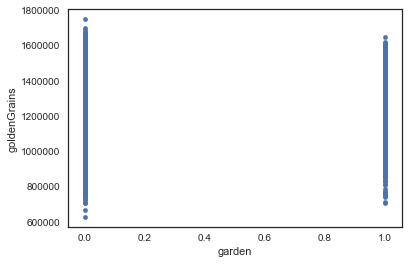

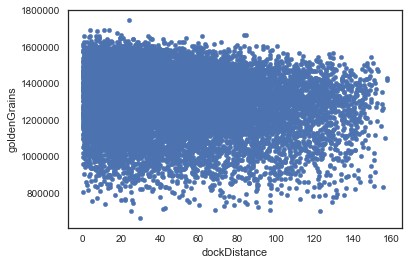

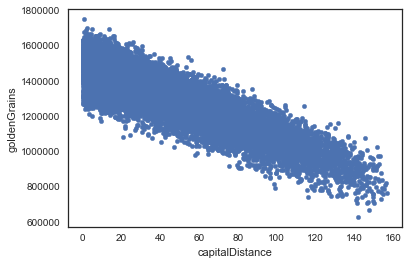

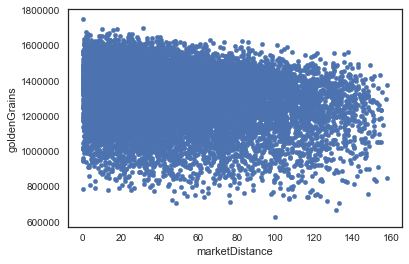

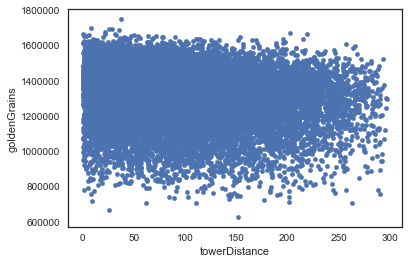

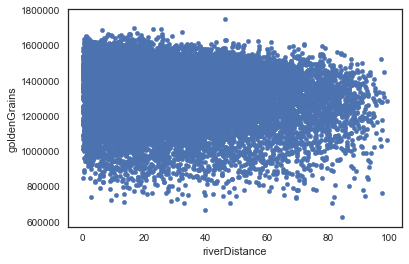

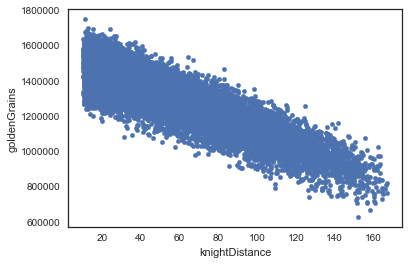

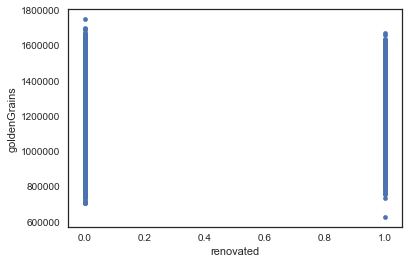

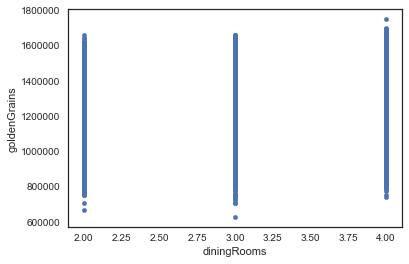

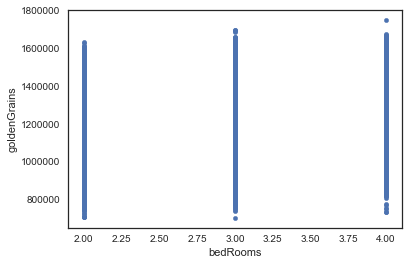

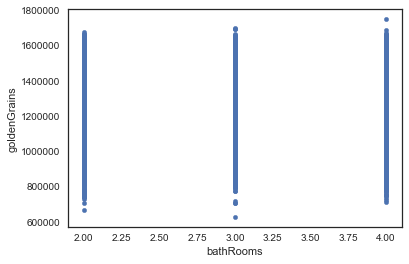

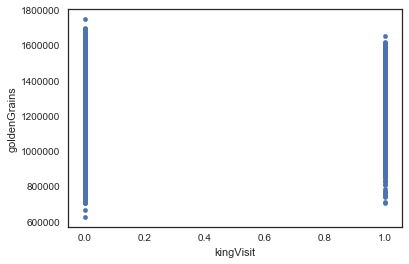

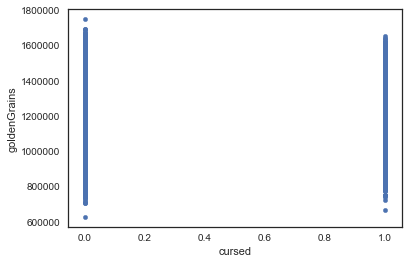

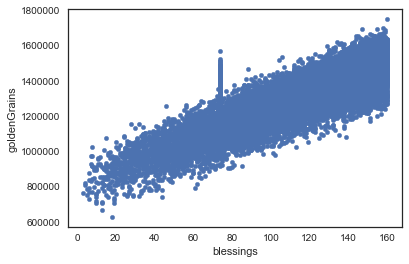

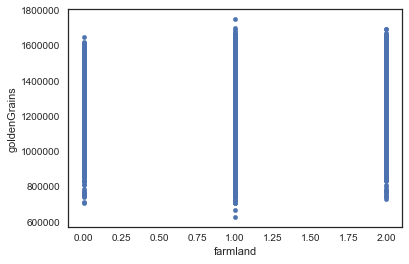

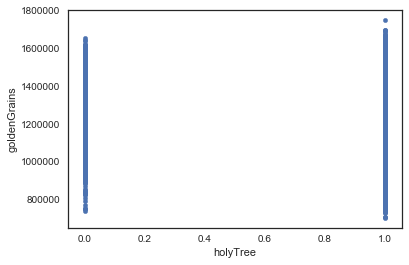

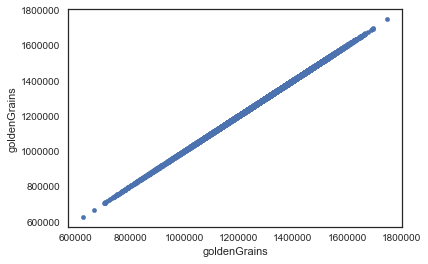

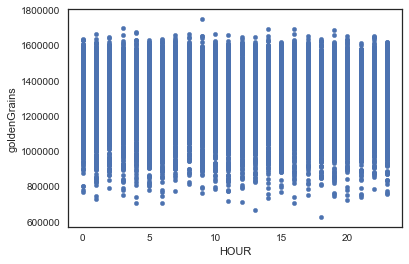

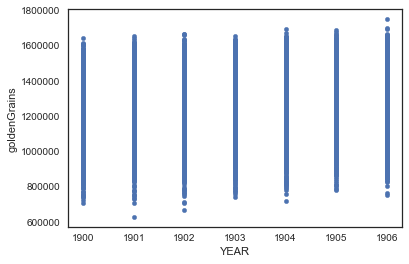

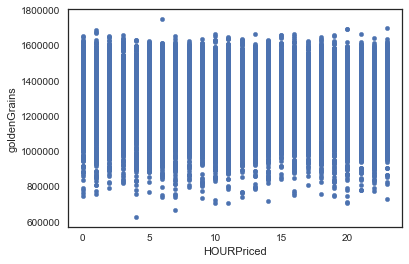

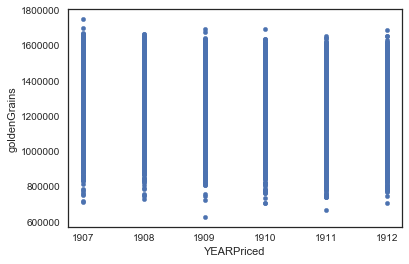

In [776]:
%matplotlib inline
for i in [
 
 'garden',
 'dockDistance',
 'capitalDistance',
 'marketDistance',
 'towerDistance',
 'riverDistance',
 'knightDistance',
 'renovated',
 'diningRooms',
 'bedRooms',
 'bathRooms',
 'kingVisit',
 'cursed',
 'blessings',
 'farmland',
 'holyTree',
 'goldenGrains','HOUR','YEAR','HOURPriced','YEARPriced']:
    iris.plot(kind="scatter", x=i, y="goldenGrains")


In [ ]:
df

In [ ]:
sns.FacetGrid(iris, hue="location", size=10) \
   .map(plt.scatter, "blessings", "goldenGrains") \
   .add_legend()


In [ ]:
df.describe()
list(df)

In [777]:
target_map = {'Bob':0, 'Bright_Brothers':1,'Masters_of_Stones':2,'Not_Known':3,'The_Greens':4,'The_Kings':5,'The_Lannisters':5,'The_Ollivers':6,'The_Overlords':7,'The_Starks':8,'Wood_Priests':9 }
# Use the pandas apply method to numerically encode our attrition target variable

df['builder'] = df['builder'].apply(lambda x: target_map[x])
#max(list(df['builder']))



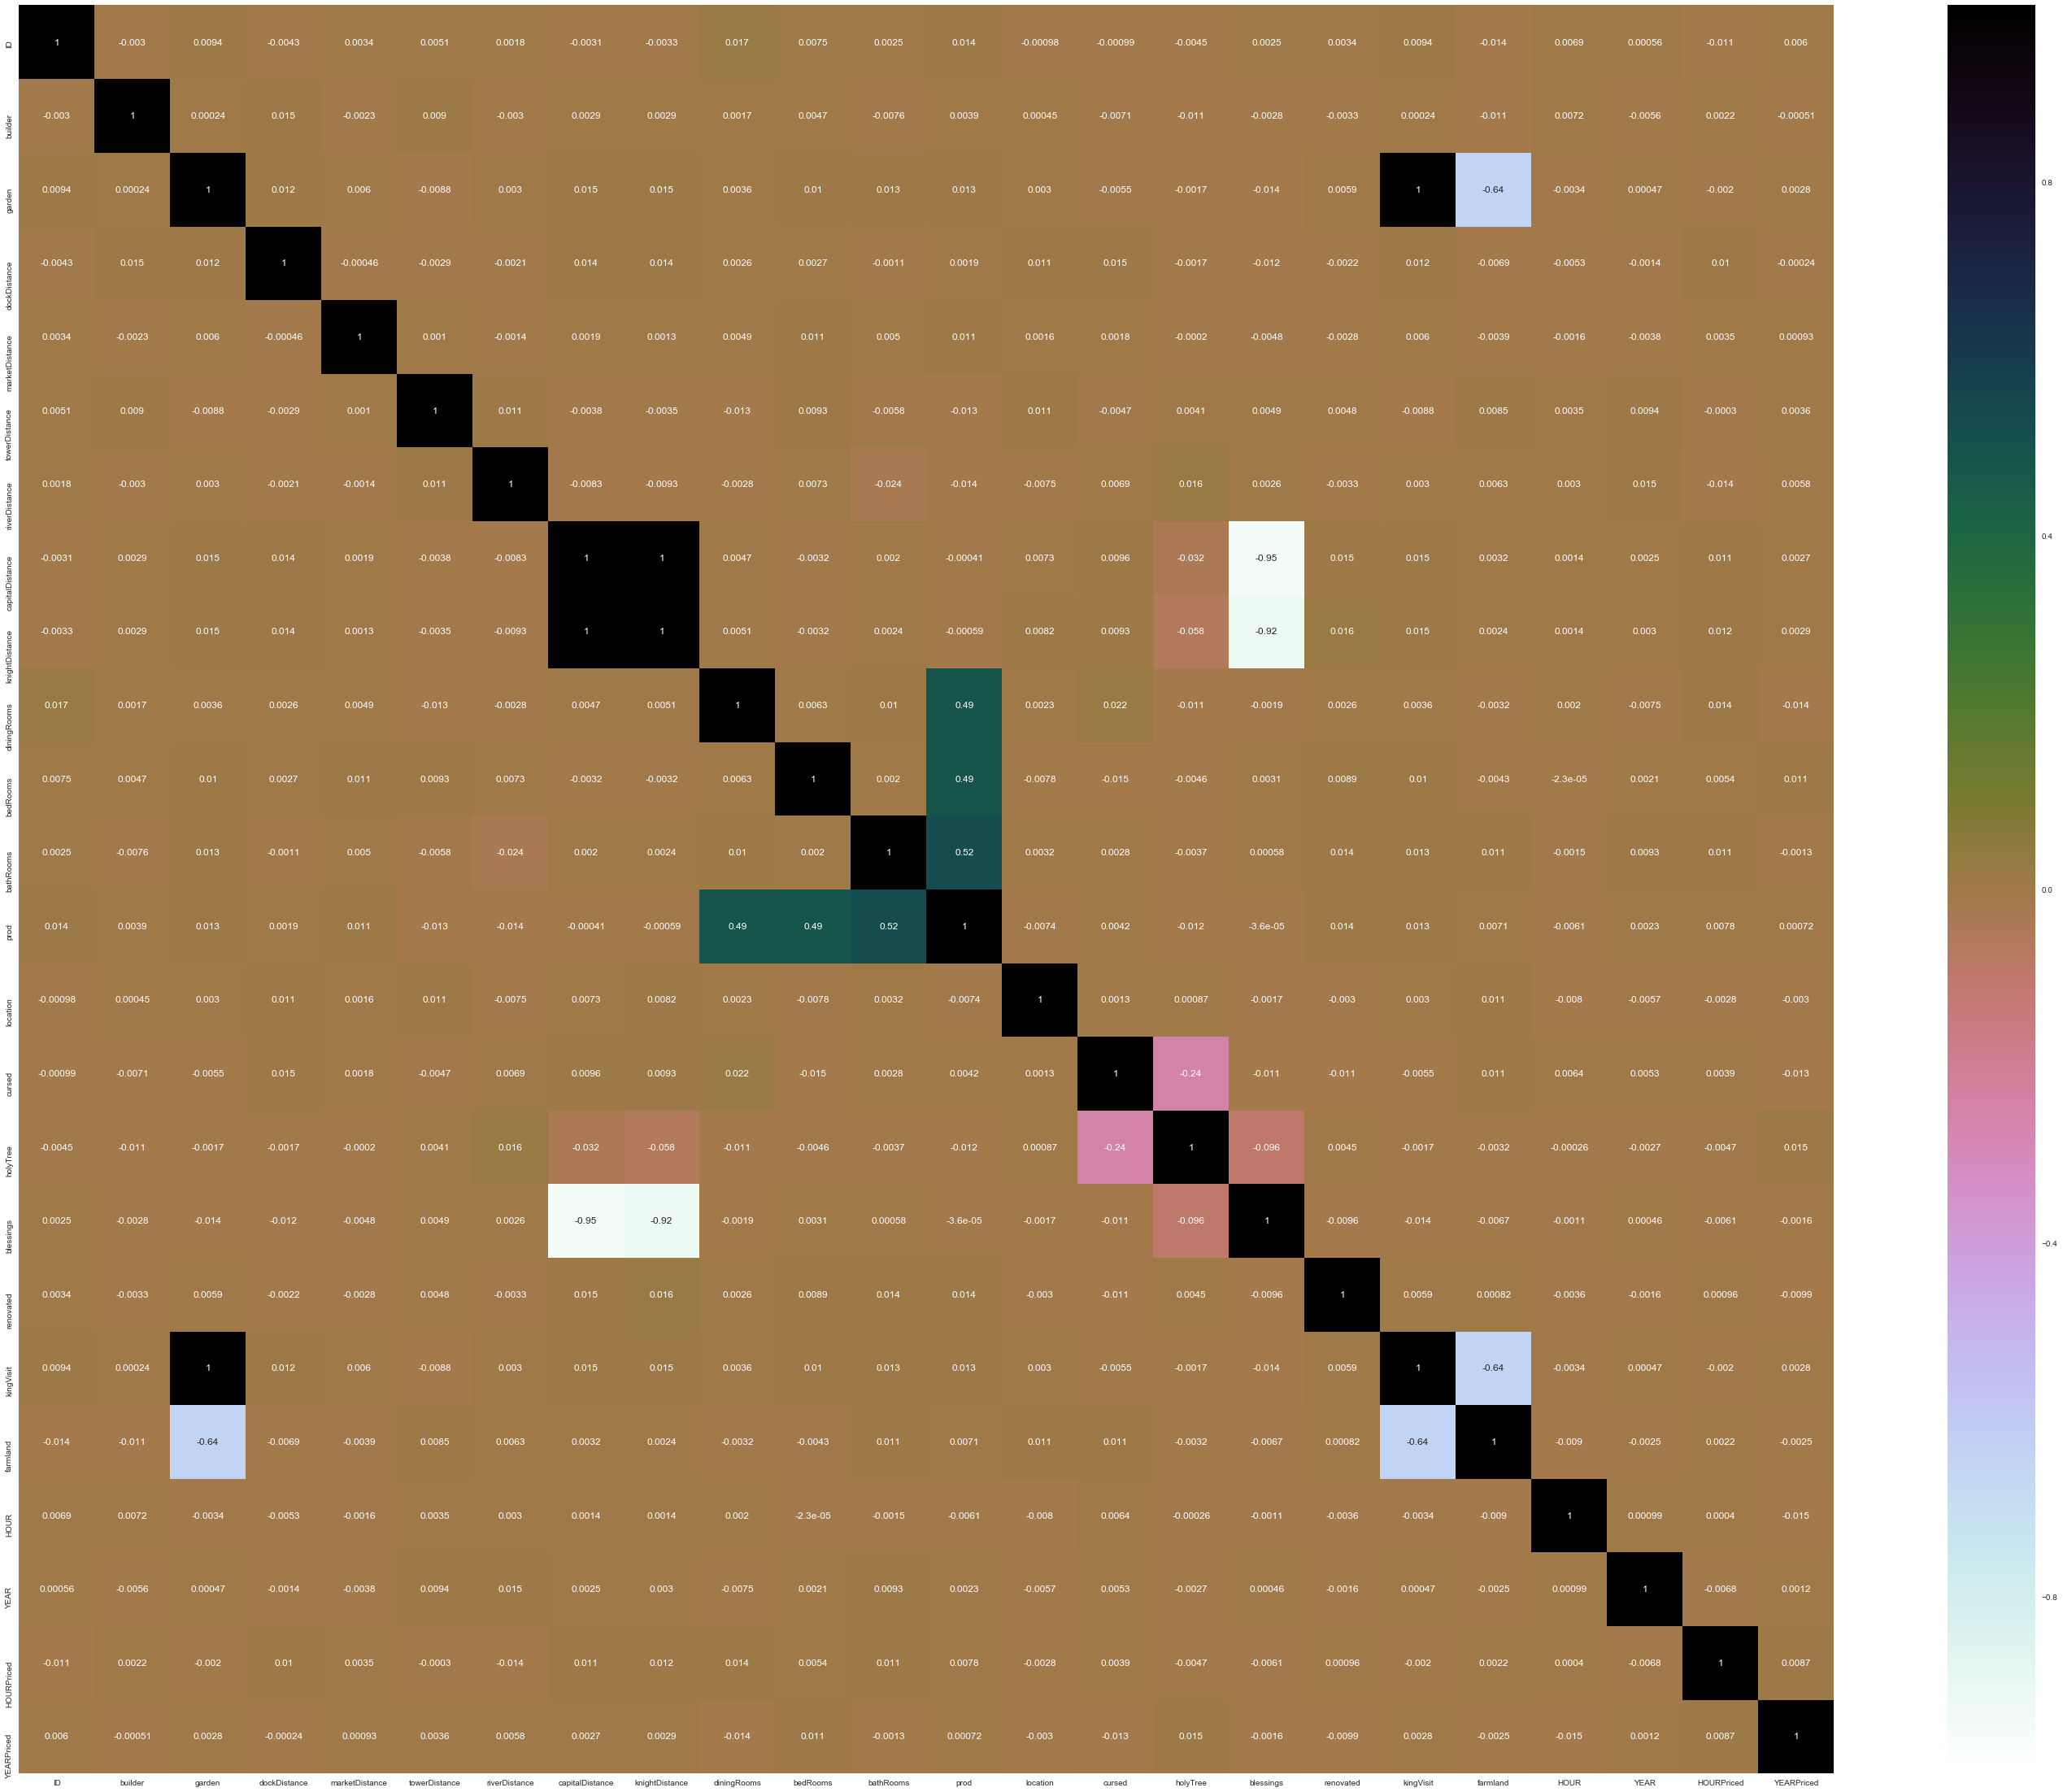

In [852]:
X=iris[['ID',
 'houseID',
 'builder',
 'dateBuilt',
 'datePriced',
 'garden',
 'dockDistance',
 'marketDistance',
 'towerDistance',
 'riverDistance',
 
      'capitalDistance',
 'knightDistance',
 
 
 'diningRooms',
 'bedRooms',
 'bathRooms',
      
 
 
 
 'location',
 'cursed','holyTree',
     'blessings','renovated','kingVisit','farmland','HOUR','YEAR','HOURPriced','YEARPriced']]
Y=iris['goldenGrains']

plt.figure(figsize=(50,40)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [ ]:
count=0
for i in range(16500):
        if pd.isnull(df.iloc[i,7]):
            if pd.isnull(df.iloc[i,11]):
                count=count+1

count2=0
for i in range(16500):
        if df.iloc[i,7]==df.iloc[i,11]:
            count2=count2+1
dif=0
for i in range(16500):
    if pd.notnull(df.iloc[i,7]):
        dif = max(abs(int(df.iloc[i,7])-int(df.iloc[i,11])),dif)
print(count,count2,dif)
print(list(df))
    


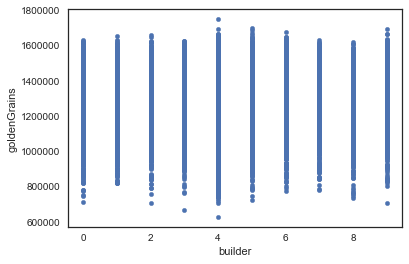

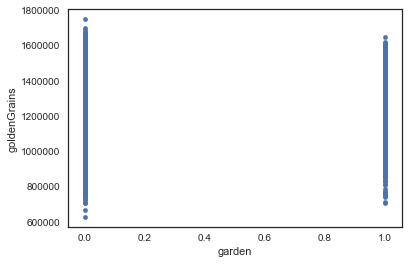

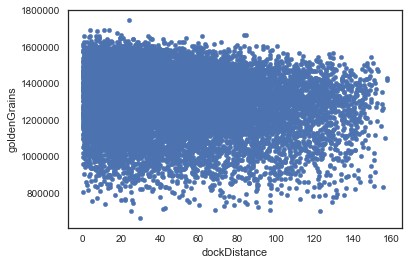

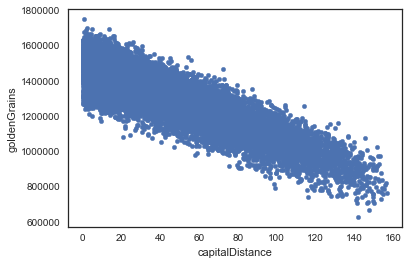

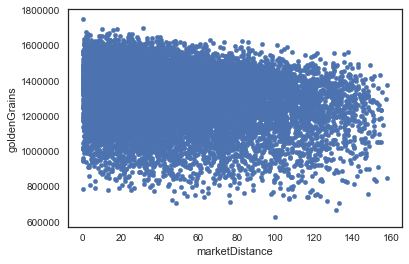

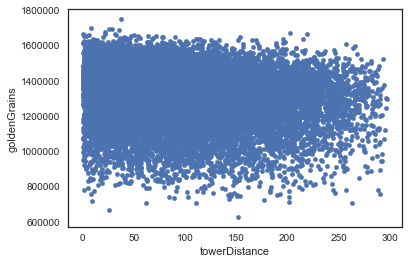

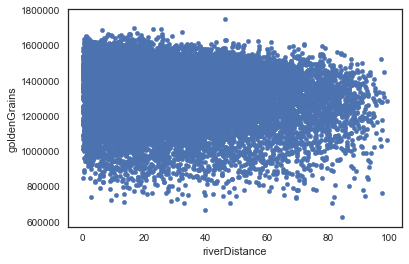

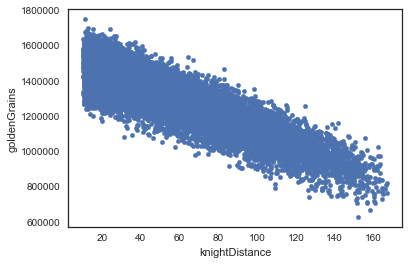

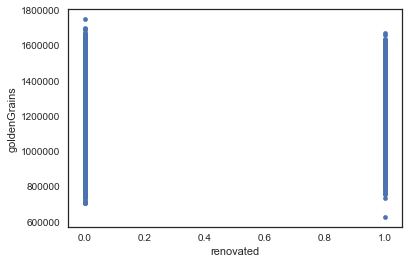

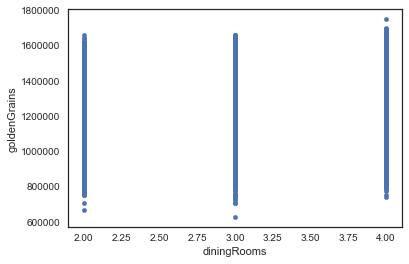

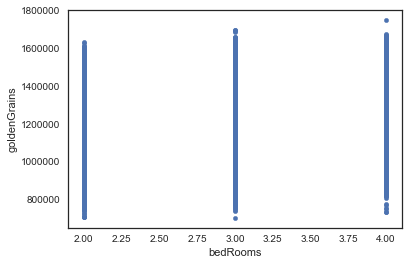

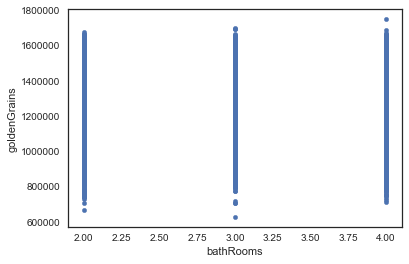

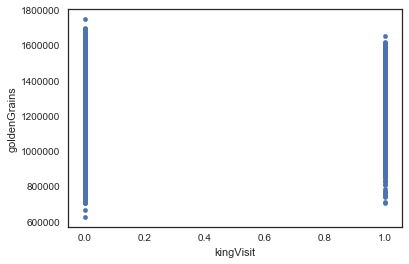

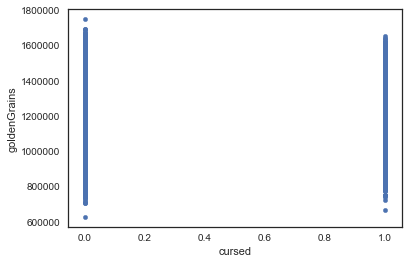

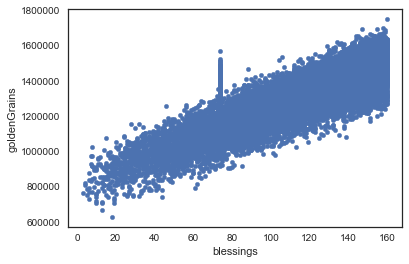

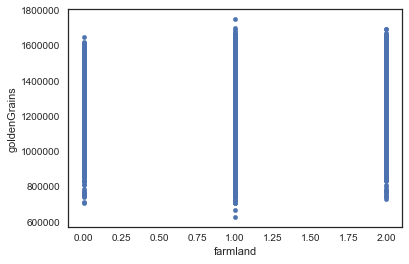

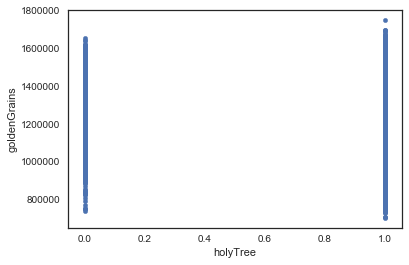

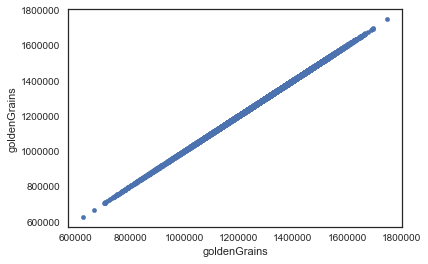

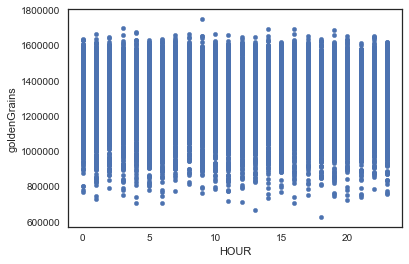

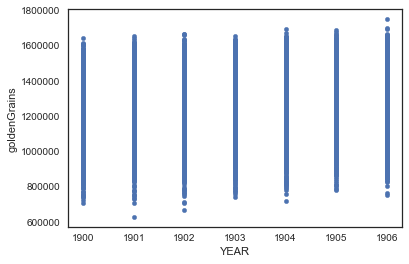

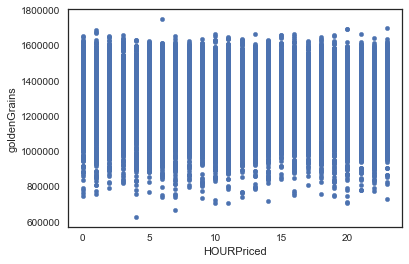

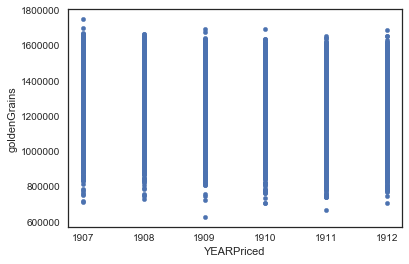

In [778]:
for i in [ 'builder', 'garden', 'dockDistance', 'capitalDistance', 'marketDistance', 'towerDistance', 'riverDistance', 'knightDistance', 'renovated', 'diningRooms', 'bedRooms', 'bathRooms', 'kingVisit', 'cursed', 'blessings', 'farmland', 'holyTree', 'goldenGrains','HOUR','YEAR','HOURPriced','YEARPriced']:
    df.plot(kind="scatter", x=i, y="goldenGrains")

In [782]:
df.isnull().sum()

ID                 0
houseID            0
builder            0
dateBuilt          0
datePriced         0
garden             0
dockDistance       0
capitalDistance    0
marketDistance     0
towerDistance      0
riverDistance      0
knightDistance     0
renovated          0
diningRooms        0
bedRooms           0
bathRooms          0
kingVisit          0
cursed             0
blessings          0
farmland           0
location           0
holyTree           0
goldenGrains       0
HOUR               0
MONTH              0
DATE               0
YEAR               0
HOURPriced         0
MONTHPriced        0
DATEPriced         0
YEARPriced         0
prod               0
proddis            0
proddis2           0
dtype: int64

In [779]:
dt = pd.DataFrame({'a':list(df['YEAR'])})
dt.groupby('a').count()
dt['a'].value_counts()
#
#df.isnull().sum()


# I can leave imputation and training over garden (compensated by kingvisit)
# Only one out of capitalDistance and knightDistance is to be trained and imputed
# GG devreases on incresing capitalDistance,knightDistance
# blessings incresing GG incresing


1905    2400
1901    2385
1906    2380
1902    2375
1900    2336
1903    2333
1904    2291
Name: a, dtype: int64

In [ ]:
df.describe()

In [858]:
df['knightDistance']=df['knightDistance'].fillna(34.365941)
df['capitalDistance']=df['capitalDistance'].fillna(34.365941)
df['marketDistance']=df['marketDistance'].fillna(48.715817)
df['towerDistance']=df['towerDistance'].fillna(101.110421)
df['dockDistance']=df['dockDistance'].fillna(46.305520)
df['location']=df['location'].fillna('the mountains')
df['farmland']=df['farmland'].fillna(1)
df['diningRooms']=df['diningRooms'].fillna(3)
df['bathRooms']=df['bathRooms'].fillna(2)
df['bedRooms']=df['bedRooms'].fillna(3)
df['holyTree']=df['holyTree'].fillna(3)
df['cursed']=df['cursed'].fillna(0)
df['renovated']=df['renovated'].fillna(0)
df['garden']=df['garden'].fillna(0)
df=df.assign(prod=(df['bedRooms']+df['bathRooms']+df['diningRooms'])//3.0)
df=df.assign(proddis=(df['dockDistance']*df['marketDistance']*df['towerDistance']*df['riverDistance'])**(1/3))
df=df.assign(proddis2=np.sqrt(df['capitalDistance']*df['knightDistance']))


In [859]:
df


,ID,houseID,builder,dateBuilt,datePriced,garden,dockDistance,capitalDistance,marketDistance,towerDistance,...,MONTH,DATE,YEAR,HOURPriced,MONTHPriced,DATEPriced,YEARPriced,prod,proddis,proddis2
0,1,6e32cec0,0,1902-04-21 00:41:00,1909-07-09 01:11:00,0.0,138.600639,0.256239,69.486467,14.394903,...,4,21,1902,1,7,9,1909,3.0,206.057577,1.640719
1,2,6e32cec4,8,1900-08-23 00:25:00,1912-05-02 22:32:00,1.0,16.254871,26.882222,34.145238,101.052598,...,8,23,1900,22,5,2,1912,2.0,144.009713,31.644085
2,3,6e32cec9,3,1900-05-05 11:39:00,1908-06-10 08:17:00,0.0,6.555428,136.448973,78.445508,88.480988,...,5,5,1900,8,6,10,1908,2.0,148.688266,141.410940
3,4,6e32cece,5,1903-02-10 20:51:00,1911-06-05 23:44:00,0.0,79.724550,19.885265,92.698917,22.395136,...,2,10,1903,23,6,5,1911,2.0,110.082276,24.392422
4,5,6e32ced1,4,1903-01-05 02:46:00,1910-10-08 05:18:00,0.0,101.541256,0.519507,3.605055,81.449646,...,1,5,1903,5,10,8,1910,2.0,102.108948,2.374796
5,6,6e32ced3,4,1903-01-25 18:38:00,1912-01-12 11:28:00,0.0,48.601612,7.575922,32.236989,47.180399,...,1,25,1903,11,1,12,1912,3.0,174.685812,11.799811
6,7,6e32ced5,9,1900-03-12 01:19:00,1907-10-26 21:54:00,0.0,32.624227,1.955970,88.485147,77.692256,...,3,12,1900,21,10,26,1907,2.0,196.692315,4.922844
7,8,6e32ced7,2,1903-04-28 00:52:00,1910-05-19 21:42:00,0.0,84.170405,15.776747,62.816373,51.870346,...,4,28,1903,21,5,19,1910,3.0,195.820279,20.343410
8,9,6e32ceda,0,1903-10-23 23:14:00,1911-10-21 07:40:00,0.0,10.998322,122.930753,63.794375,53.019891,...,10,23,1903,7,10,21,1911,3.0,85.912484,127.834718
9,10,6e32cedd,1,1901-06-25 09:41:00,1907-11-01 09:54:00,0.0,60.265361,2.809867,23.701329,89.658984,...,6,25,1901,9,11,1,1907,3.0,167.863928,6.087438


In [783]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier # A combine model of many decision trees
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)

In [784]:
target_map={'the mountains':0,"king's landing": 1,"servant's premises":2,"cursed land":3}
df['location']=df['location'].apply(lambda x: target_map[x])

In [785]:
train, test = train_test_split(df, test_size = 0.3, random_state=1212)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)
list(df)


(11550, 34)
(4950, 34)


['ID',
 'houseID',
 'builder',
 'dateBuilt',
 'datePriced',
 'garden',
 'dockDistance',
 'capitalDistance',
 'marketDistance',
 'towerDistance',
 'riverDistance',
 'knightDistance',
 'renovated',
 'diningRooms',
 'bedRooms',
 'bathRooms',
 'kingVisit',
 'cursed',
 'blessings',
 'farmland',
 'location',
 'holyTree',
 'goldenGrains',
 'HOUR',
 'MONTH',
 'DATE',
 'YEAR',
 'HOURPriced',
 'MONTHPriced',
 'DATEPriced',
 'YEARPriced',
 'prod',
 'proddis',
 'proddis2']

In [882]:
train_X = train[[ 'builder','dockDistance',  'marketDistance', 'towerDistance', 'riverDistance','capitalDistance','diningRooms','bedRooms',
 'bathRooms' , 'cursed', 'blessings', 'farmland', 'location', 'holyTree','YEAR','YEARPriced','MONTH','MONTHPriced','HOUR']]# taking the training data features

train_y = train[['goldenGrains']]# output of our training data
test_X = test[[ 'builder','dockDistance',  'marketDistance', 'towerDistance', 'riverDistance','capitalDistance','diningRooms','bedRooms',
 'bathRooms' , 'cursed', 'blessings', 'farmland', 'location', 'holyTree','YEAR','YEARPriced','MONTH','MONTHPriced','HOUR']]# taking the training data features
# taking the training data features
# taking test data features
test_y = test[['goldenGrains']]   #output value of test data


In [884]:
list(df)

['ID',
 'houseID',
 'builder',
 'dateBuilt',
 'datePriced',
 'garden',
 'dockDistance',
 'capitalDistance',
 'marketDistance',
 'towerDistance',
 'riverDistance',
 'knightDistance',
 'renovated',
 'diningRooms',
 'bedRooms',
 'bathRooms',
 'kingVisit',
 'cursed',
 'blessings',
 'farmland',
 'location',
 'holyTree',
 'goldenGrains',
 'HOUR',
 'MONTH',
 'DATE',
 'YEAR',
 'HOURPriced',
 'MONTHPriced',
 'DATEPriced',
 'YEARPriced',
 'prod',
 'proddis',
 'proddis2']

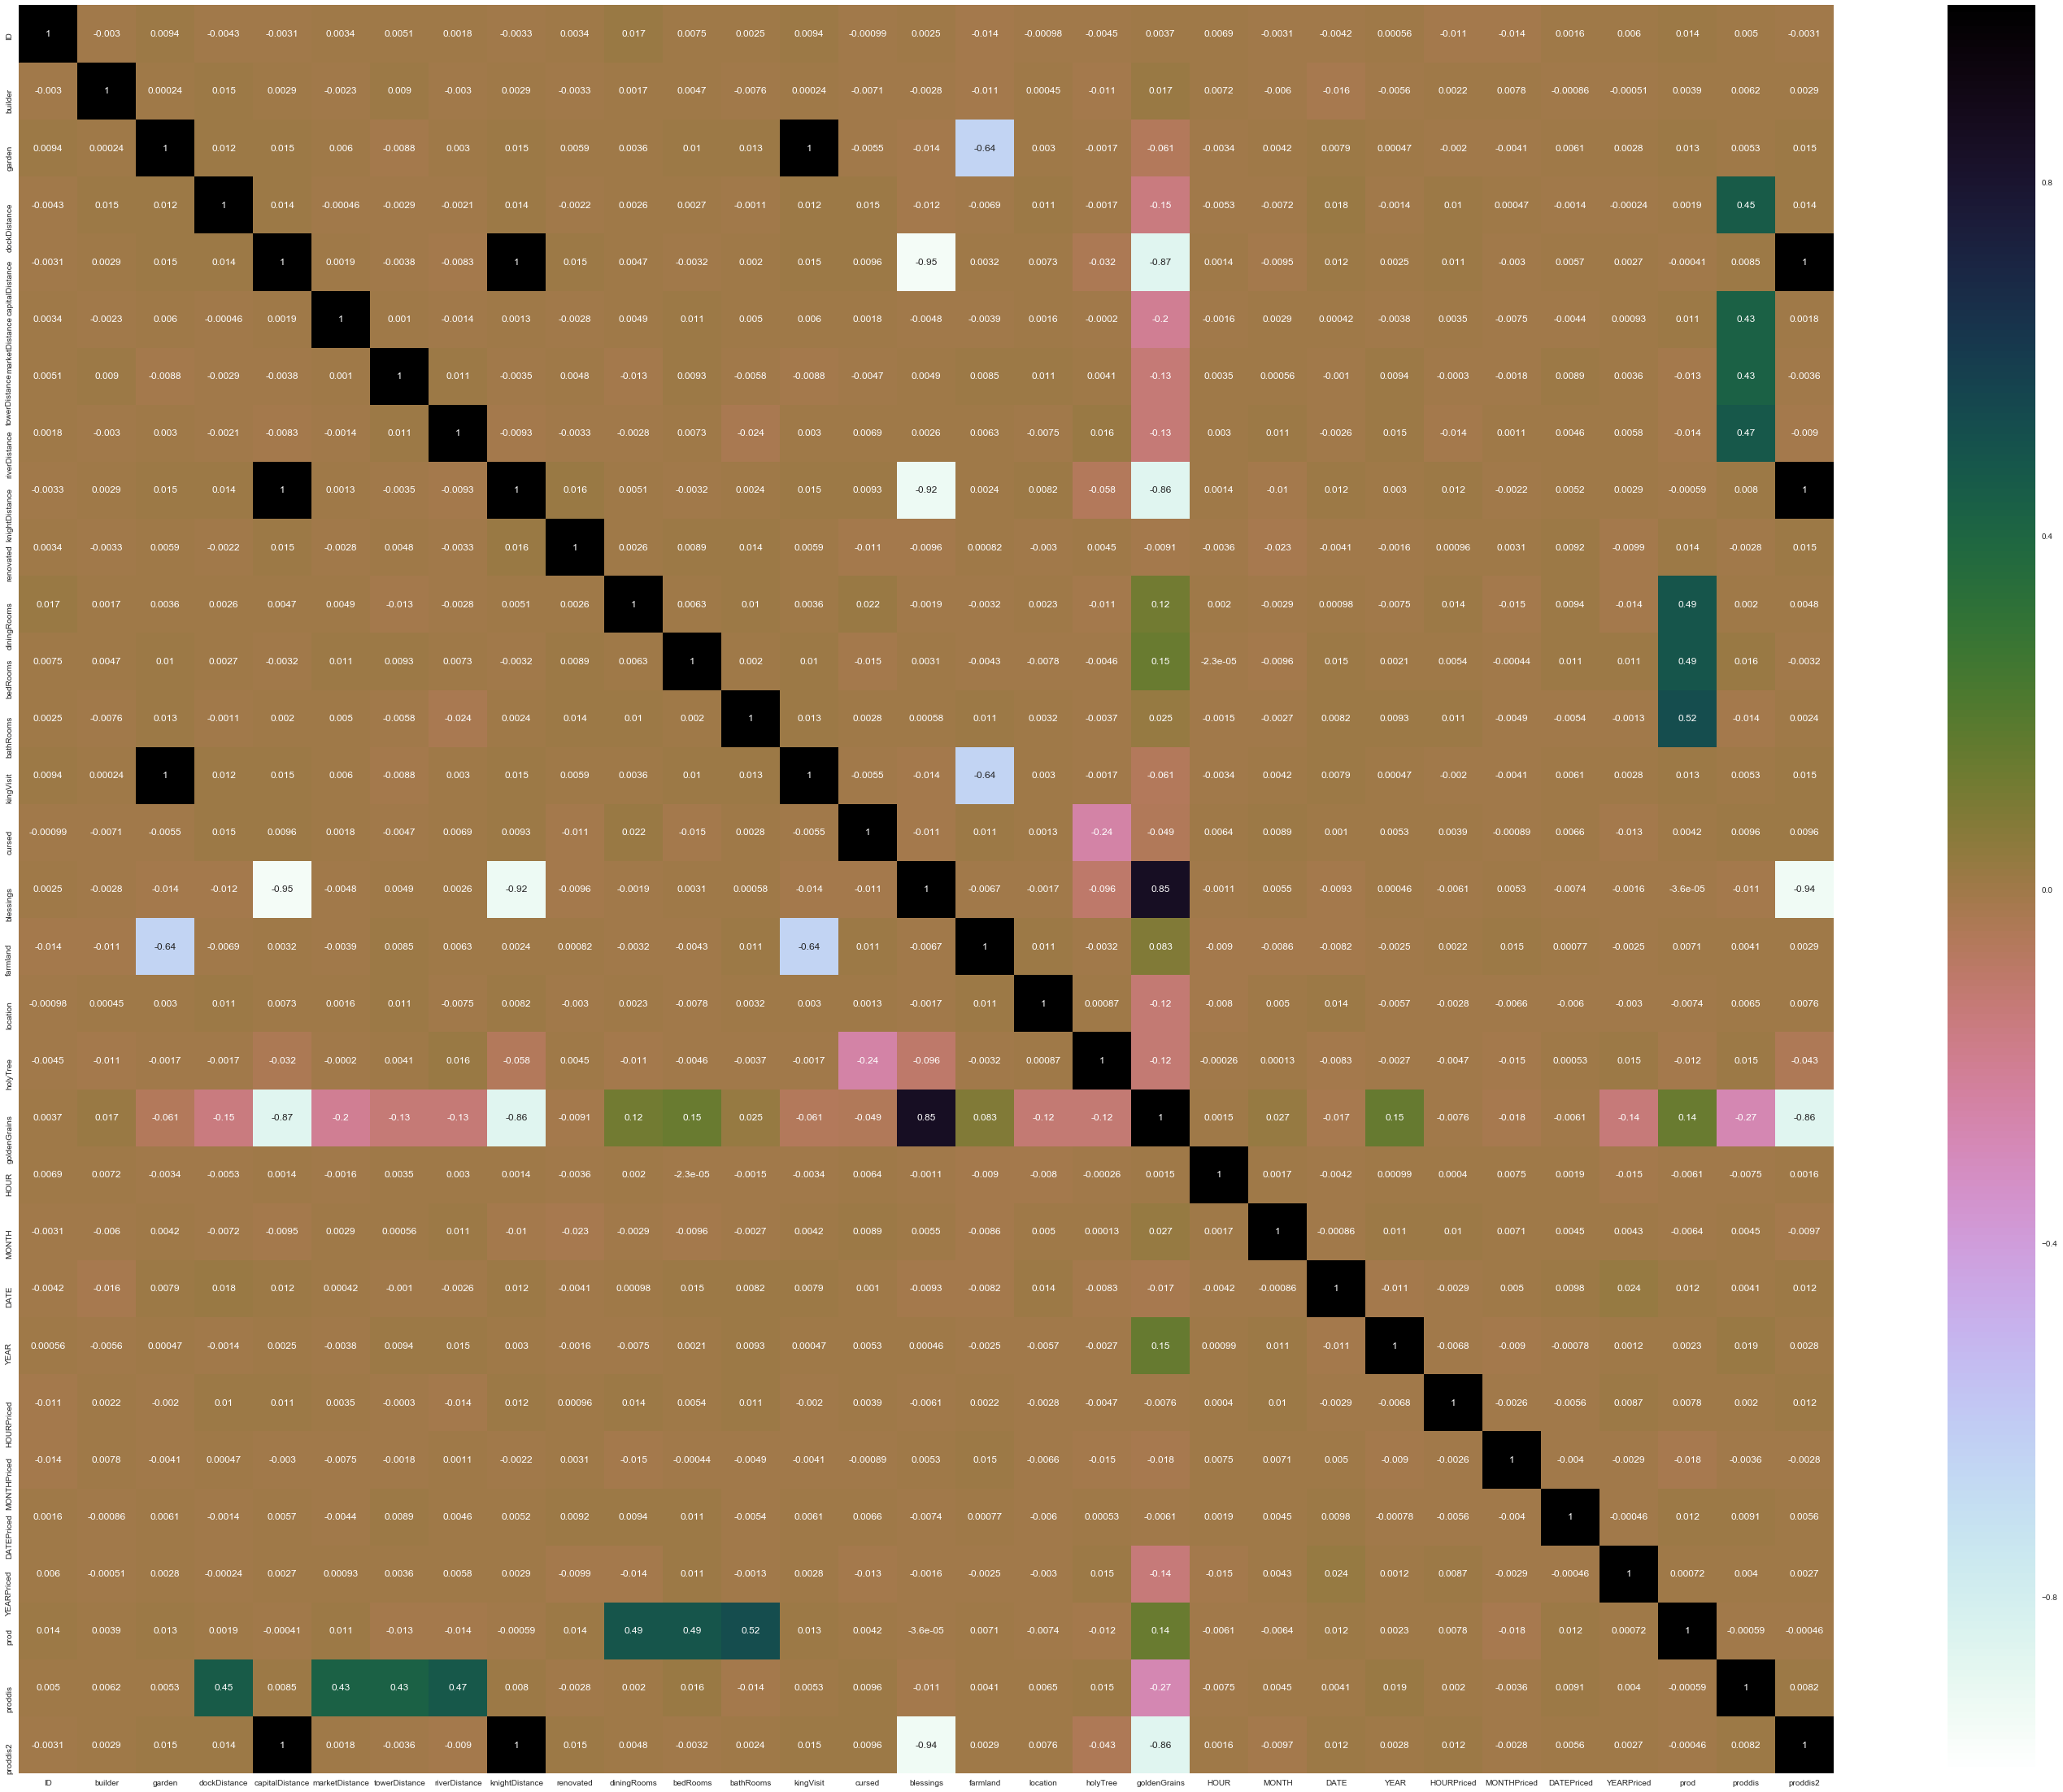

In [885]:
X=df[['ID',
 'houseID',
 'builder',
 'dateBuilt',
 'datePriced',
 'garden',
 'dockDistance',
 'capitalDistance',
 'marketDistance',
 'towerDistance',
 'riverDistance',
 'knightDistance',
 'renovated',
 'diningRooms',
 'bedRooms',
 'bathRooms',
 'kingVisit',
 'cursed',
 'blessings',
 'farmland',
 'location',
 'holyTree',
 'goldenGrains',
 'HOUR',
 'MONTH',
 'DATE',
 'YEAR',
 'HOURPriced',
 'MONTHPriced',
 'DATEPriced',
 'YEARPriced',
 'prod',
 'proddis',
 'proddis2']]
Y=df['goldenGrains']

plt.figure(figsize=(50,40)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [883]:
#model = LogisticRegression()

from sklearn import linear_model
from sklearn.metrics import r2_score
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:

neigh =  linear_model.LinearRegression(normalize=True)#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
neigh.fit(train_X, train_y) 
prediction=neigh.predict(test_X)

#len(prediction)
len(test_y)
print('The accuracy of the Logistic Regression is',r2_score(prediction,test_y))


The accuracy of the Logistic Regression is 0.972666552942


In [862]:
#model = LogisticRegression()

from sklearn import linear_model
from sklearn.metrics import r2_score
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
from sklearn.neighbors import KNeighborsRegressor

#for i in range(1,100):
neigh = linear_model.SGDRegressor()
#neigh.fit(tr_X, tr_y) 
prediction=neigh.fit(train_X, train_y).predict(test_X)
print('The accuracy of the Logistic Regression is',r2_score(prediction,test_y))


The accuracy of the Logistic Regression is -4.07121957339


In [863]:
#model = LogisticRegression()

from sklearn import linear_model
from sklearn.metrics import r2_score
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
for i in frange(0,5,0.1):
    neigh =  linear_model.Lasso(alpha=i,normalize=True)#    neigh.fit(train_X, train_y) 
    #plt.plot(train_X,train_y)
    neigh.fit(train_X, train_y) 
    prediction=neigh.predict(test_X)

    #len(prediction)
    len(test_y)
    print('The accuracy of the Logistic Regression is',r2_score(prediction,test_y))


The accuracy of the Logistic Regression is 0.973378019376
The accuracy of the Logistic Regression is 0.973372021198
The accuracy of the Logistic Regression is 0.973363509691
The accuracy of the Logistic Regression is 0.973354787994
The accuracy of the Logistic Regression is 0.973345960156
The accuracy of the Logistic Regression is 0.973336889392
The accuracy of the Logistic Regression is 0.973327575465
The accuracy of the Logistic Regression is 0.973318018134
The accuracy of the Logistic Regression is 0.973307963403
The accuracy of the Logistic Regression is 0.973297905735
The accuracy of the Logistic Regression is 0.973287601925
The accuracy of the Logistic Regression is 0.973277051732
The accuracy of the Logistic Regression is 0.973266254914
The accuracy of the Logistic Regression is 0.97325521123
The accuracy of the Logistic Regression is 0.973243920442
The accuracy of the Logistic Regression is 0.97323238231
The accuracy of the Logistic Regression is 0.973220596591
The accuracy of 

In [305]:
#model = LogisticRegression()

from sklearn import linear_model
from sklearn.metrics import r2_score
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
for i in frange(0,1.5,0.1):
    neigh =  linear_model.ElasticNet(alpha=i,normalize=True)#    neigh.fit(train_X, train_y) 
    #plt.plot(train_X,train_y)
    neigh.fit(train_X, train_y) 
    prediction=neigh.predict(test_X)

    #len(prediction)
    len(test_y)
    print('The accuracy of the Logistic Regression is',r2_score(prediction,test_y))


The accuracy of the Logistic Regression is 0.929184401747
The accuracy of the Logistic Regression is -108879.830174
The accuracy of the Logistic Regression is -435378.498776
The accuracy of the Logistic Regression is -979563.213418
The accuracy of the Logistic Regression is -1741502.14387
The accuracy of the Logistic Regression is -2721263.47184
The accuracy of the Logistic Regression is -3918915.39091
The accuracy of the Logistic Regression is -5334526.10658
The accuracy of the Logistic Regression is -6968163.83627
The accuracy of the Logistic Regression is -8819896.80929
The accuracy of the Logistic Regression is -10889793.2668
The accuracy of the Logistic Regression is -13177921.462
The accuracy of the Logistic Regression is -15684349.6599
The accuracy of the Logistic Regression is -18409146.1372
The accuracy of the Logistic Regression is -21352379.1829


In [665]:
from sklearn import linear_model
from sklearn.metrics import r2_score
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,30):
    neigh = KNeighborsRegressor(n_neighbors=i,algorithm='auto',weights='distance')
#neigh.fit(tr_X, tr_y) 
    prediction=neigh.fit(train_X, train_y).predict(test_X)
    print('The accuracy of the Logistic Regression is',r2_score(prediction,test_y),i)


The accuracy of the Logistic Regression is 0.691374287435 1
The accuracy of the Logistic Regression is 0.746066295309 2
The accuracy of the Logistic Regression is 0.770570516604 3
The accuracy of the Logistic Regression is 0.78127678094 4
The accuracy of the Logistic Regression is 0.786625297473 5
The accuracy of the Logistic Regression is 0.79117029903 6
The accuracy of the Logistic Regression is 0.79306836301 7
The accuracy of the Logistic Regression is 0.794982777713 8
The accuracy of the Logistic Regression is 0.795917751566 9
The accuracy of the Logistic Regression is 0.79687924448 10
The accuracy of the Logistic Regression is 0.796849042474 11
The accuracy of the Logistic Regression is 0.797373597989 12
The accuracy of the Logistic Regression is 0.798112243588 13
The accuracy of the Logistic Regression is 0.797548121283 14
The accuracy of the Logistic Regression is 0.797015838375 15
The accuracy of the Logistic Regression is 0.796623862313 16
The accuracy of the Logistic Regressi

In [83]:
from sklearn import linear_model

tr=df
tE=pd.read_csv('test.csv')
te=pd.DataFrame(tE)

te['knightDistance']=te['knightDistance'].fillna(34.365941)
te['capitalDistance']=te['capitalDistance'].fillna(34.365941)
te['marketDistance']=te['marketDistance'].fillna(48.715817)
te['towerDistance']=te['towerDistance'].fillna(101.110421)
te['dockDistance']=te['dockDistance'].fillna(46.305520)
te['location']=te['location'].fillna('the mountains')
te['farmland']=te['farmland'].fillna(1)
te['diningRooms']=te['diningRooms'].fillna(3)
te['bathRooms']=te['bathRooms'].fillna(2)
te['bedRooms']=te['bedRooms'].fillna(3)
te['holyTree']=te['holyTree'].fillna(3)
te['cursed']=te['cursed'].fillna(0)
te['renovated']=te['renovated'].fillna(0)
te['garden']=te['garden'].fillna(0)
target_map={'the mountains':0,"king's landing": 1,"servant's premises":2,"cursed land":3}
te['location']=te['location'].apply(lambda x: target_map[x])
target_map = {'Bob':0, 'Bright_Brothers':1,'Masters_of_Stones':2,'Not_Known':3,'The_Greens':4,'The_Kings':5,'The_Lannisters':5,'The_Ollivers':6,'The_Overlords':7,'The_Starks':8,'Wood_Priests':9 }
# Use the pandas apply method to numerically encode our attrition target variable

te['builder'] = te['builder'].apply(lambda x: target_map[x])
#max(list(df['builder']))

model=linear_model.Lasso(alpha=i,normalize=True)
tr_X = tr[from sklearn import linear_model
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
#neigh.fit(train_X, train_y) 
#prediction=neigh.predict(test_X)
####
k=4
tr=df
tE=pd.read_csv('test.csv')
te=pd.DataFrame(tE)

te['knightDistance']=te['knightDistance'].fillna(34.365941)
te['capitalDistance']=te['capitalDistance'].fillna(34.365941)
te['marketDistance']=te['marketDistance'].fillna(48.715817)
te['towerDistance']=te['towerDistance'].fillna(101.110421)
te['dockDistance']=te['dockDistance'].fillna(46.305520)
te['location']=te['location'].fillna('the mountains')
te['farmland']=te['farmland'].fillna(1)
te['diningRooms']=te['diningRooms'].fillna(3)
te['bathRooms']=te['bathRooms'].fillna(2)
te['bedRooms']=te['bedRooms'].fillna(3)
te['holyTree']=te['holyTree'].fillna(3)
te['cursed']=te['cursed'].fillna(0)
te['renovated']=te['renovated'].fillna(0)
te['garden']=te['garden'].fillna(0)
target_map={'the mountains':0,"king's landing": 1,"servant's premises":2,"cursed land":3}
te['location']=te['location'].apply(lambda x: target_map[x])
target_map = {'Bob':0, 'Bright_Brothers':1,'Masters_of_Stones':2,'Not_Known':3,'The_Greens':4,'The_Kings':5,'The_Lannisters':5,'The_Ollivers':6,'The_Overlords':7,'The_Starks':8,'Wood_Priests':9 }
# Use the pandas apply method to numerically encode our attrition target variable

te['builder'] = te['builder'].apply(lambda x: target_map[x])
#max(list(df['builder']))

model=linear_model.Lasso(alpha=i,normalize=True)
tr_X = tr[['builder', 'dockDistance', 'capitalDistance', 'marketDistance', 'towerDistance', 'riverDistance', 'renovated', 'diningRooms', 'bedRooms', 'bathRooms', 'kingVisit', 'cursed', 'blessings', 'farmland', 'location', 'holyTree']]# taking the training data features
# taking the training data features

tr_y = tr[['goldenGrains']]# output of our training data
te_X = te[from sklearn import linear_model
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
#neigh.fit(train_X, train_y) 
#prediction=neigh.predict(test_X)
####
k=4
tr=df
tE=pd.read_csv('test.csv')
te=pd.DataFrame(tE)

te['knightDistance']=te['knightDistance'].fillna(34.365941)
te['capitalDistance']=te['capitalDistance'].fillna(34.365941)
te['marketDistance']=te['marketDistance'].fillna(48.715817)
te['towerDistance']=te['towerDistance'].fillna(101.110421)
te['dockDistance']=te['dockDistance'].fillna(46.305520)
te['location']=te['location'].fillna('the mountains')
te['farmland']=te['farmland'].fillna(1)
te['diningRooms']=te['diningRooms'].fillna(3)
te['bathRooms']=te['bathRooms'].fillna(2)
te['bedRooms']=te['bedRooms'].fillna(3)
te['holyTree']=te['holyTree'].fillna(3)
te['cursed']=te['cursed'].fillna(0)
te['renovated']=te['renovated'].fillna(0)
te['garden']=te['garden'].fillna(0)
target_map={'the mountains':0,"king's landing": 1,"servant's premises":2,"cursed land":3}
te['location']=te['location'].apply(lambda x: target_map[x])
target_map = {'Bob':0, 'Bright_Brothers':1,'Masters_of_Stones':2,'Not_Known':3,'The_Greens':4,'The_Kings':5,'The_Lannisters':5,'The_Ollivers':6,'The_Overlords':7,'The_Starks':8,'Wood_Priests':9 }
# Use the pandas apply method to numerically encode our attrition target variable

te['builder'] = te['builder'].apply(lambda x: target_map[x])
#max(list(df['builder']))

model=linear_model.Lasso(alpha=0,normalize=True)
tr_X = tr[from sklearn import linear_model
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
#neigh.fit(train_X, train_y) 
#prediction=neigh.predict(test_X)
####
k=4
tr=df
tE=pd.read_csv('test.csv')
te=pd.DataFrame(tE)

te['knightDistance']=te['knightDistance'].fillna(34.365941)
te['capitalDistance']=te['capitalDistance'].fillna(34.365941)
te['marketDistance']=te['marketDistance'].fillna(48.715817)
te['towerDistance']=te['towerDistance'].fillna(101.110421)
te['dockDistance']=te['dockDistance'].fillna(46.305520)
te['location']=te['location'].fillna('the mountains')
te['farmland']=te['farmland'].fillna(1)
te['diningRooms']=te['diningRooms'].fillna(3)
te['bathRooms']=te['bathRooms'].fillna(2)
te['bedRooms']=te['bedRooms'].fillna(3)
te['holyTree']=te['holyTree'].fillna(3)
te['cursed']=te['cursed'].fillna(0)
te['renovated']=te['renovated'].fillna(0)
te['garden']=te['garden'].fillna(0)
target_map={'the mountains':0,"king's landing": 1,"servant's premises":2,"cursed land":3}
te['location']=te['location'].apply(lambda x: target_map[x])
target_map = {'Bob':0, 'Bright_Brothers':1,'Masters_of_Stones':2,'Not_Known':3,'The_Greens':4,'The_Kings':5,'The_Lannisters':5,'The_Ollivers':6,'The_Overlords':7,'The_Starks':8,'Wood_Priests':9 }
# Use the pandas apply method to numerically encode our attrition target variable

te['builder'] = te['builder'].apply(lambda x: target_map[x])
#max(list(df['builder']))

model=linear_model.Lasso(alpha=i,normalize=True)
tr_X = tr[['builder', 'dockDistance', 'capitalDistance', 'marketDistance', 'towerDistance', 'riverDistance', 'renovated', 'diningRooms', 'bedRooms', 'bathRooms', 'kingVisit', 'cursed', 'blessings', 'farmland', 'location', 'holyTree']]# taking the training data features
# taking the training data features

tr_y = tr[['goldenGrains']]# output of our training data
te_X = te[from sklearn import linear_model
k=0.9
#b=[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.9,3.0]
#for k in b:
#neigh =  linear_model.LinearRegression()#    neigh.fit(train_X, train_y) 
#plt.plot(train_X,train_y)
#neigh.fit(train_X, train_y) 
#prediction=neigh.predict(test_X)
####


In [864]:
k=4
tr=df
tE=pd.read_csv('test.csv')
te=pd.DataFrame(tE)
######

te['datePriced']=te['datePriced'].apply(lambda x:x.upper())
for i in range(3500):
    string=str(te.iloc[i,4])
    index=re.search(r'[0-9]+/[0-9]+(/.*)',string).start(1);
    li=list(string)

    li[index+2]='9'
    stre = ''.join(str(e) for e in li)
    te.iloc[i,4]=stre

te['datePriced']=pd.to_datetime(te.datePriced)
te['HOURPriced'] = te['datePriced'].dt.hour
te['MONTHPriced'] = te['datePriced'].dt.month
te['DATEPriced'] = te['datePriced'].dt.day
te['YEARPriced'] = te['datePriced'].dt.year

te['dateBuilt']=te['dateBuilt'].apply(lambda x:x.upper())
for i in range(3500):
    string=str(te.iloc[i,3])
    index=re.search(r'[0-9]+/[0-9]+(/.*)',string).start(1);
    li=list(string)

    li[index+2]='9'
    stre = ''.join(str(e) for e in li)
    te.iloc[i,3]=stre

te['dateBuilt']=pd.to_datetime(te.dateBuilt)
te['HOUR'] = te['dateBuilt'].dt.hour
te['MONTH'] = te['dateBuilt'].dt.month
te['DATE'] = te['dateBuilt'].dt.day
te['YEAR'] = te['dateBuilt'].dt.year



######
te['knightDistance']=te['knightDistance'].fillna(34.365941)
te['capitalDistance']=te['capitalDistance'].fillna(34.365941)
te['marketDistance']=te['marketDistance'].fillna(48.715817)
te['towerDistance']=te['towerDistance'].fillna(101.110421)
te['dockDistance']=te['dockDistance'].fillna(46.305520)
te['location']=te['location'].fillna('the mountains')
te['farmland']=te['farmland'].fillna(1)
te['diningRooms']=te['diningRooms'].fillna(3)
te['bathRooms']=te['bathRooms'].fillna(2)
te['bedRooms']=te['bedRooms'].fillna(3)
te['holyTree']=te['holyTree'].fillna(3)
te['cursed']=te['cursed'].fillna(0)
te['renovated']=te['renovated'].fillna(0)
te['garden']=te['garden'].fillna(0)
te=te.assign(prod=(te['bedRooms']+te['bathRooms']+te['diningRooms'])//3.0)

target_map={'the mountains':0,"king's landing": 1,"servant's premises":2,"cursed land":3}
te['location']=te['location'].apply(lambda x: target_map[x])
target_map = {'Bob':0, 'Bright_Brothers':1,'Masters_of_Stones':2,'Not_Known':3,'The_Greens':4,'The_Kings':5,'The_Lannisters':5,'The_Ollivers':6,'The_Overlords':7,'The_Starks':8,'Wood_Priests':9 }
# Use the pandas apply method to numerically encode our attrition target variable

te['builder'] = te['builder'].apply(lambda x: target_map[x])
#max(list(df['builder']))

model=linear_model.LinearRegression(normalize=True)
tr_X = tr[[ 'builder','dockDistance',  'marketDistance', 'towerDistance', 'riverDistance','capitalDistance','diningRooms','bedRooms',
 'bathRooms' ,'kingVisit', 'cursed', 'blessings', 'farmland', 'location', 'holyTree','YEAR','YEARPriced','MONTH','MONTHPriced','HOUR','prod']]# taking the training data features

tr_y = tr[['goldenGrains']]# output of our training data
te_X = te[[ 'builder','dockDistance',  'marketDistance', 'towerDistance', 'riverDistance','capitalDistance','diningRooms','bedRooms',
 'bathRooms' ,'kingVisit', 'cursed', 'blessings', 'farmland', 'location', 'holyTree','YEAR','YEARPriced','MONTH','MONTHPriced','HOUR','prod']]# taking the training data features


model.fit(tr_X,tr_y)
prediction = model.predict(te_X)
prediction
pred=pd.DataFrame(prediction)
pred.insert(loc=0,column='houseID',value=te['houseID'])
pred.to_csv(path_or_buf='answer4prod.csv',header=['House ID','Golden Grains'],mode='w',index=False)



In [ ]:
[ 'builder','dockDistance', 'capitalDistance', 'marketDistance', 'towerDistance', 'riverDistance', 'diningRooms', 'bedRooms', 'bathRooms', 'kingVisit', 'cursed', 'blessings', 'farmland', 'location', 'holyTree']]# taking the training data features
